In [8]:
__author__  = "Jorge Ignacio Sandoval"
__version__ = "1.0.0"
__email__ = "jsandova@uchile.cl"

import configparser
import pandas as pd
import matplotlib.pyplot as plt
import os

DEBUG=1
results = configparser.ConfigParser()
config = configparser.ConfigParser()
linestyles = ['solid', 'dashed', 'dashdot', 'dotted']
colors = ['blue', 'orange', 'green', 'red', 'magenta', 'cyan', 'yellow', 'lightblue', 'pink', 'purple', 'lime']
limits = { 'jain': [0.5 , 1.1],
          'rtt': [0 , 100],
          'thr': [0 , 400],
          'buffer': [0, 1],
          }
zone = 'part-3'


In [9]:
# Version 1
def load_data( folders) -> dict:
    global DEBUG
    reg = {}
    reg['ue'] = []
    reg['flowtype'] = []
    reg['datarate'] = []
    reg['zone'] = []
    reg['thr_mean'] =  []
    reg['thr_std'] =  []
    reg['rtt_mean'] =  []
    reg['rtt_std'] =  []
    reg['buffer_rlc_mean'] =  []
    reg['buffer_rlc_std'] =  []
    reg['aqm'] =  []
    reg['jain_mean'] =  []
    reg['jain_std'] =  []
    reg['rlc_buffer'] =  []
    for folder in folders:
        if DEBUG: print(folder)
        if ( not os.path.exists(folder) ):
            print(f"Folder No Found: {folder}")
            exit()
        results.read(folder + '/' +'results.ini')
        config.read(folder + '/' +'graph.ini')
        uenum = int(results['DEFAULT']['uenum'])
        UEN1 = int(config['general']['UEN1'])
        UEN2 = int(config['general']['UEN2'])
        UEN3 = int(config['general']['UEN3'])
        UENs = [UEN1, UEN2, UEN3]
        if DEBUG: print(UENs)
        tcpTypeId1 = config['general']['tcpTypeId1']
        tcpTypeId2 = config['general']['tcpTypeId2']
        tcpTypeId3 = config['general']['tcpTypeId3']
        tcpTypeIds = [tcpTypeId1, tcpTypeId2, tcpTypeId3]
        if DEBUG: print(tcpTypeIds)
        zones = [zone]
        for part in zones:
            if DEBUG: print(part)
            if DEBUG: print(config.items('general'))
            if DEBUG: print(results.items(part))
            for ue in range(uenum):
                reg['ue'].append(ue + 1)
                flowtype = 'None'
                for i in range(len( UENs)):
                    if DEBUG: print('UE: ', ue + 1, ' max UEs: ', sum(UENs[:(i+1)]))
                    if ue + 1  <= sum(UENs[:(i+1)]):
                        flowtype = tcpTypeIds[i]
                        break
                reg['flowtype'].append(flowtype)
                reg['zone'].append(part)
                reg['datarate'].append(int(config['general']['datarate']))
                reg['thr_mean'].append(float(results[part]['thr_mean-'+ str(ue+1)]) )
                reg['thr_std'].append(float(results[part]['thr_std-'+ str(ue+1)]) )
                reg['rtt_mean'].append(float(results[part]['rtt_mean-'+ str(ue+1)]) )
                reg['rtt_std'].append(float(results[part]['rtt_std-'+ str(ue+1)]) )
                reg['buffer_rlc_mean'].append(float(results[part]['buffer_rlc_mean-'+ str(ue+1)]) )
                reg['buffer_rlc_std'].append(float(results[part]['buffer_rlc_std-'+ str(ue+1)]) )

                aqm = config['general']['aqm']
                if aqm == 'RED':
                    redMinTh = config['general']['redMinTh'] if config.has_option('general', 'redMinTh') else ''
                    aqm = aqm + redMinTh
                reg['aqm'].append(aqm)
                reg['jain_mean'].append(0)
                reg['jain_std'].append(0)
                reg['rlc_buffer'].append(float(config['general']['rlcBufferPerc']))

            reg['ue'].append(0)
            reg['flowtype'].append('NA')
            reg['zone'].append(part)
            reg['datarate'].append(int(config['general']['datarate']))
            reg['thr_mean'].append( 0 )
            reg['thr_std'].append( 0 )
            reg['rtt_mean'].append( 0 )
            reg['rtt_std'].append( 0 )
            reg['buffer_rlc_mean'].append( 0 )
            reg['buffer_rlc_std'].append( 0 )
            reg['aqm'].append(aqm)
            reg['jain_mean'].append(float(results[part]['jain_mean']))
            reg['jain_std'].append(float(results[part]['jain_std']))
            reg['rlc_buffer'].append(float(config['general']['rlcBufferPerc']))
    if DEBUG: print("End load_data")
    if DEBUG: print(reg)
    
    return reg


In [10]:
# Version 2
def load_data( folders) -> dict:
    global DEBUG
    reg = {}
    reg['ue'] = []
    reg['flowtype'] = []
    reg['datarate'] = []
    reg['zone'] = []
    reg['thr_mean'] =  []
    reg['thr_std'] =  []
    reg['rtt_mean'] =  []
    reg['rtt_std'] =  []
    reg['buffer_rlc_mean'] =  []
    reg['buffer_rlc_std'] =  []
    reg['aqm'] =  []
    reg['jain_mean'] =  []
    reg['jain_std'] =  []
    reg['rlc_buffer'] =  []
    for folder in folders:
        if DEBUG: print(folder)
        if ( not os.path.exists(folder) ):
            print(f"Folder No Found: {folder}")
            exit()
        results.read(folder + '/' +'results.ini')
        config.read(folder + '/' +'graph.ini')
        uenum = int(results['DEFAULT']['uenum'])
        UEN1 = int(config['general']['UEN1'])
        UEN2 = int(config['general']['UEN2'])
        UEN3 = int(config['general']['UEN3'])
        UENs = [UEN1, UEN2, UEN3]
        if DEBUG: print(UENs)
        tcpTypeId1 = config['general']['tcpTypeId1']
        tcpTypeId2 = config['general']['tcpTypeId2']
        tcpTypeId3 = config['general']['tcpTypeId3']
        tcpTypeIds = [tcpTypeId1, tcpTypeId2, tcpTypeId3]
        if DEBUG: print(tcpTypeIds)
        zones = [zone]
        for part in zones:
            if DEBUG: print(part)
            if DEBUG: print(config.items('general'))
            if DEBUG: print(results.items(part))
            for ue in range(uenum + 1):
                reg['ue'].append(ue)
                flowtype = 'None'
                for i in range(len( UENs)):
                    if DEBUG: print('UE: ', ue , ' max UEs: ', sum(UENs[:(i+1)]))
                    if ue + 1  <= sum(UENs[:(i+1)]):
                        flowtype = tcpTypeIds[i]
                        break
                reg['flowtype'].append(flowtype)
                reg['zone'].append(part)
                reg['datarate'].append(int(config['general']['datarate']))
                reg['thr_mean'].append(float(results[part]['thr_mean-'+ str(ue)]) )
                reg['thr_std'].append(float(results[part]['thr_std-'+ str(ue)]) )
                reg['rtt_mean'].append(float(results[part]['rtt_mean-'+ str(ue)]) )
                reg['rtt_std'].append(float(results[part]['rtt_std-'+ str(ue)]) )
                reg['buffer_rlc_mean'].append(float(results[part]['buffer_rlc_mean-'+ str(ue)]) )
                reg['buffer_rlc_std'].append(float(results[part]['buffer_rlc_std-'+ str(ue)]) )

                aqm = config['general']['aqm']
                if aqm == 'RED':
                    redMinTh = config['general']['redMinTh'] if config.has_option('general', 'redMinTh') else ''
                    aqm = aqm + redMinTh
                reg['aqm'].append(aqm)
                if ue == 0:
                    reg['jain_mean'].append(float(results[part]['jain_mean']))
                    reg['jain_std'].append(float(results[part]['jain_std']))
                    reg['rlc_buffer'].append(float(config['general']['rlcBufferPerc']))
                else:
                    reg['jain_mean'].append(0)
                    reg['jain_std'].append(0)
                    reg['rlc_buffer'].append(float(config['general']['rlcBufferPerc']))
            
    if DEBUG: print("End load_data")
    if DEBUG: print(reg)
    
    return reg


,CCA,10.0,100.0,200.0,300.0,400.0,500.0
0,UDP,-0.000050,0.000002,0.000002,0.000002,0.000002,0.000002
1,BBR,-0.115928,-0.052654,-0.108109,0.020905,1.527825,1.504726
2,New Reno,-0.503070,0.384008,0.113349,0.309538,-0.362337,-0.003888
3,CUBIC,-0.147395,2.957039,0.099273,0.207642,1.711814,-0.047182
4,High Speed,-0.086965,-0.208631,0.300055,-0.115136,0.035339,0.087963


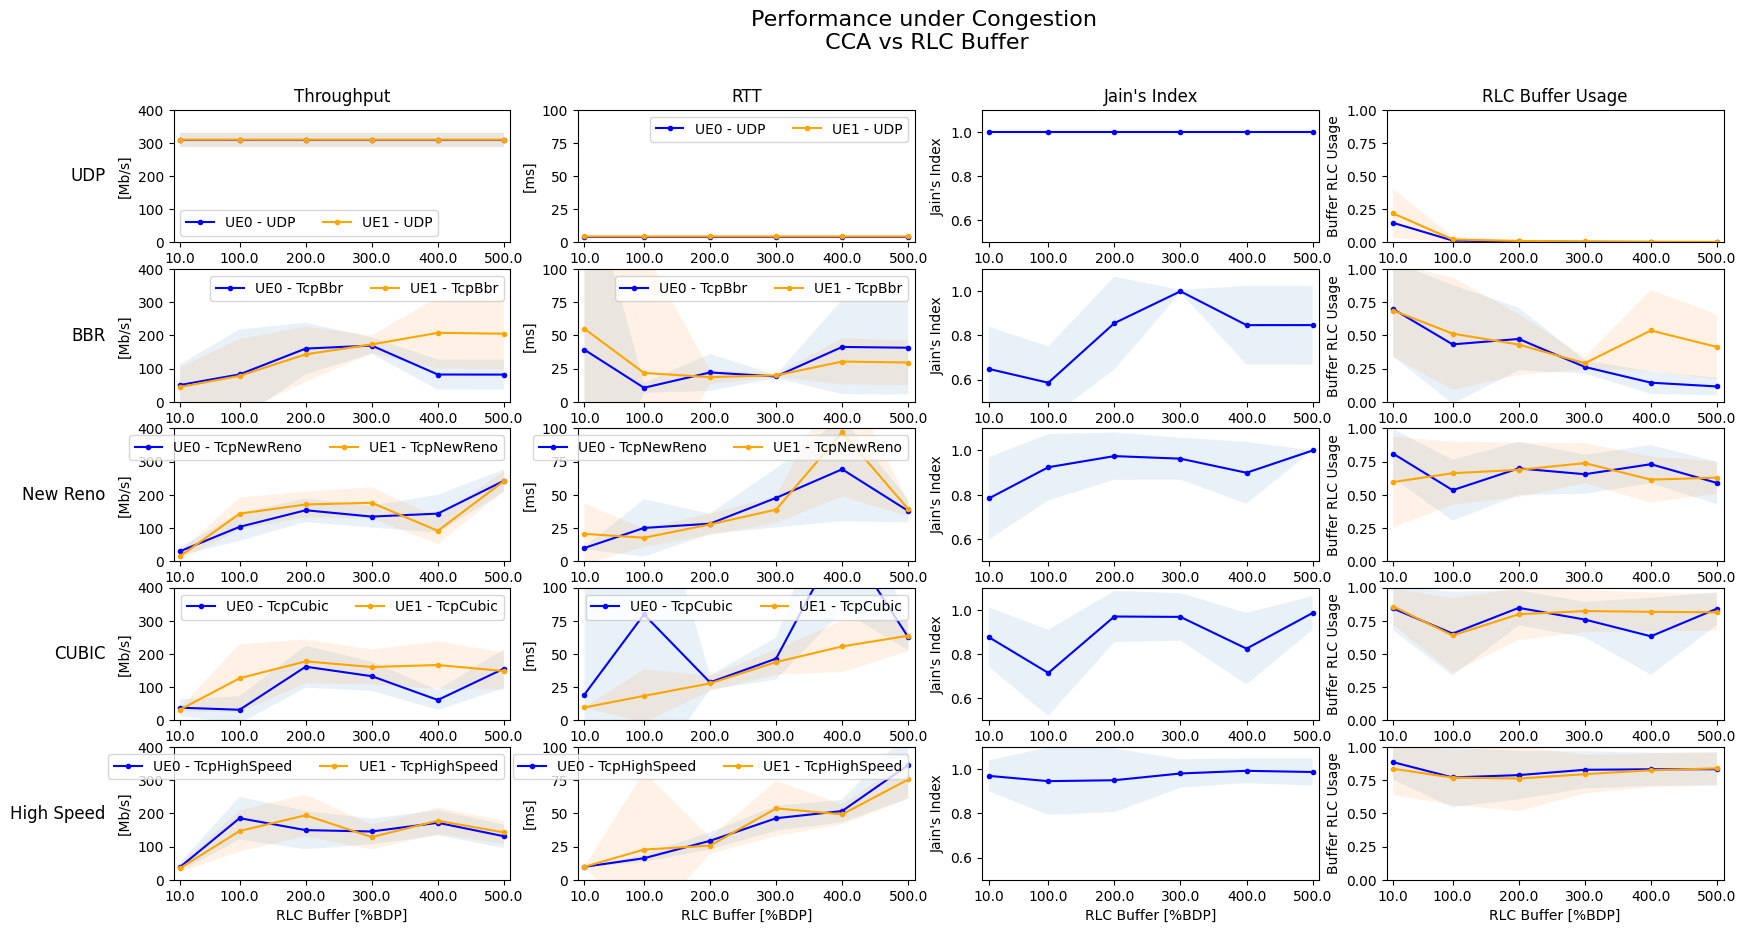

In [11]:
# CCA vs RLC Buffer - AQM None
DEBUG=0
UDP = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-UDP-UDP-UDP-E-010-UE_2_0_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-UDP-UDP-UDP-E-100-UE_2_0_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-UDP-UDP-UDP-E-200-UE_2_0_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-UDP-UDP-UDP-E-300-UE_2_0_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-UDP-UDP-UDP-E-400-UE_2_0_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-UDP-UDP-UDP-E-500-UE_2_0_0-AQM_None-0_60-600',
]
TcpBbr = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-UDP-UDP-E-010-UE_2_0_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-UDP-UDP-E-100-UE_2_0_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-UDP-UDP-E-200-UE_2_0_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-UDP-UDP-E-300-UE_2_0_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-UDP-UDP-E-400-UE_2_0_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-UDP-UDP-E-500-UE_2_0_0-AQM_None-0_60-600',
]
TcpNewReno = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-UDP-UDP-E-010-UE_2_0_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-UDP-UDP-E-100-UE_2_0_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-UDP-UDP-E-200-UE_2_0_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-UDP-UDP-E-300-UE_2_0_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-UDP-UDP-E-400-UE_2_0_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-UDP-UDP-E-500-UE_2_0_0-AQM_None-0_60-600',
]
TcpCubic = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-UDP-UDP-E-010-UE_2_0_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-UDP-UDP-E-100-UE_2_0_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-UDP-UDP-E-200-UE_2_0_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-UDP-UDP-E-300-UE_2_0_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-UDP-UDP-E-400-UE_2_0_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-UDP-UDP-E-500-UE_2_0_0-AQM_None-0_60-600',
]
TcpHighSpeed = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-UDP-UDP-E-010-UE_2_0_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-UDP-UDP-E-100-UE_2_0_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-UDP-UDP-E-200-UE_2_0_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-UDP-UDP-E-300-UE_2_0_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-UDP-UDP-E-400-UE_2_0_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-UDP-UDP-E-500-UE_2_0_0-AQM_None-0_60-600',
]
files = [[ 'UDP' , UDP],
         [ 'BBR' , TcpBbr],
         [ 'New Reno', TcpNewReno],
         [ 'CUBIC', TcpCubic],
         [ 'High Speed', TcpHighSpeed ]
         ]

title = 'Throughput'
subtitle = 'CCA vs RLC BUffer'
text_legend = []
fig, ax = plt.subplots(nrows = len(files), ncols = 4, figsize = (20,10))

table_rate = {}
for cca in range(len(files)):
    reg = load_data(files[cca][1])
    if DEBUG: print("Load_Data")
    if DEBUG: print(reg)
    df = pd.DataFrame.from_dict(reg)
    df = df[df['zone'] == zone]
    if DEBUG: print(df)
    
    if cca == 0:
            table_rate['CCA'] = []
    table_rate['CCA'].append(files[cca][0])

    buffers = df['rlc_buffer'].unique()
    
    for a in range(len(buffers)):
        if cca == 0:
            table_rate[buffers[a]] = []
        rate = df[(df['ue'] == 2) & (df['rlc_buffer'] ==  buffers[a])]['thr_mean'].values[0] / df[(df['ue'] == 1) & (df['rlc_buffer'] ==  buffers[a])]['thr_mean'].values[0]
        rate = rate -1
        table_rate[buffers[a]].append(rate)
        if DEBUG: print (f'cca: {files[cca][0]}, aqm: {buffers[a]}, rate: {rate}\n')

    for ue in range(df['ue'].max()):
        # Throughput
        if DEBUG: print('ue: ', ue)
        if DEBUG: print(df[df['ue'] == ue + 1].set_index('rlc_buffer')['thr_mean'])
        df[df['ue'] == ue + 1].set_index('rlc_buffer')['thr_mean'].plot(ax = ax[cca][0],
                                                                                     marker = '.',
                                                                                     color=colors[ue])
        ax[cca][0].fill_between(df[df['ue'] == ue + 1]['rlc_buffer'],
                        df[df['ue'] == ue + 1]['thr_mean'] - df[df['ue'] == ue + 1]['thr_std'],
                        df[df['ue'] == ue + 1]['thr_mean'] + df[df['ue'] == ue + 1]['thr_std'],
                        alpha = 0.1 , label='_nolegend_')
        # RTT
        df[df['ue'] == ue + 1].set_index('rlc_buffer')['rtt_mean'].plot(ax = ax[cca][1],
                                                                                     marker = '.',
                                                                                     color=colors[ue])
        ax[cca][1].fill_between(df[df['ue'] == ue + 1]['rlc_buffer'],
                        df[df['ue'] == ue + 1]['rtt_mean'] - df[df['ue'] == ue + 1]['rtt_std'],
                        df[df['ue'] == ue + 1]['rtt_mean'] + df[df['ue'] == ue + 1]['rtt_std'],
                        alpha = 0.1 , label='_nolegend_')
        # Buffer RLC
        df[df['ue'] == ue + 1].set_index('rlc_buffer')['buffer_rlc_mean'].plot(ax = ax[cca][3],
                                                                                     marker = '.',
                                                                                     color=colors[ue])
        ax[cca][3].fill_between(df[df['ue'] == ue + 1]['rlc_buffer'],
                        df[df['ue'] == ue + 1]['buffer_rlc_mean'] - df[df['ue'] == ue + 1]['buffer_rlc_std'],
                        df[df['ue'] == ue + 1]['buffer_rlc_mean'] + df[df['ue'] == ue + 1]['buffer_rlc_std'],
                        alpha = 0.1 , label='_nolegend_')
    # Jain Index
    df[df['ue'] == 0].set_index('rlc_buffer')['jain_mean'].plot(ax = ax[cca][2],
                                                            marker = '.',
                                                            color=colors[0])
    ax[cca][2].fill_between(df[df['ue']== 0]['rlc_buffer'],
                       df[df['ue'] == 0]['jain_mean'] - df[df['ue'] == 0]['jain_std'],
                       df[df['ue'] == 0]['jain_mean'] + df[df['ue'] == 0]['jain_std'],
                       alpha = 0.1, label='_nolegend_')
    
    df['legend'] = 'UE' + df['ue'].astype(str) + ' - ' + df['flowtype']
    text_legend = [  str(i)  for i in df['legend'].unique()]
    ax[cca][0].legend(text_legend, ncol = 2)
    ax[cca][1].legend(text_legend, ncol = 2)

    ax[cca][0].set_xlabel("")
    ax[cca][1].set_xlabel("")
    ax[cca][2].set_xlabel("")
    ax[cca][3].set_xlabel("")
    
    ax[cca][0].set_ylabel("[Mb/s]")
    ax[cca][1].set_ylabel("[ms]")
    ax[cca][2].set_ylabel("Jain\'s Index")
    ax[cca][3].set_ylabel("Buffer RLC Usage")

    ax[cca][0].set_ylim(limits['thr'])
    ax[cca][1].set_ylim(limits['rtt'])
    ax[cca][2].set_ylim(limits['jain'])
    ax[cca][3].set_ylim(limits['buffer'])

    ax[cca][0].set_xticks(df['rlc_buffer'].unique()) 
    ax[cca][0].set_xticklabels(df['rlc_buffer'].unique()) 
    ax[cca][1].set_xticks(df['rlc_buffer'].unique()) 
    ax[cca][1].set_xticklabels(df['rlc_buffer'].unique()) 
    ax[cca][2].set_xticks(df['rlc_buffer'].unique()) 
    ax[cca][2].set_xticklabels(df['rlc_buffer'].unique()) 
    ax[cca][3].set_xticks(df['rlc_buffer'].unique()) 
    ax[cca][3].set_xticklabels(df['rlc_buffer'].unique()) 

    ax[cca][0].set_xlim([df['rlc_buffer'].min() - 10 , df['rlc_buffer'].max() +10])
    ax[cca][1].set_xlim([df['rlc_buffer'].min() - 10 , df['rlc_buffer'].max() +10])
    ax[cca][2].set_xlim([df['rlc_buffer'].min() - 10 , df['rlc_buffer'].max() +10])
    ax[cca][3].set_xlim([df['rlc_buffer'].min() - 10 , df['rlc_buffer'].max() +10])
    
    

ax[cca][0].set_xlabel("RLC Buffer [%BDP]")
ax[cca][1].set_xlabel("RLC Buffer [%BDP]")
ax[cca][2].set_xlabel("RLC Buffer [%BDP]")
ax[cca][3].set_xlabel("RLC Buffer [%BDP]")

fig.suptitle("Performance under Congestion\n CCA vs RLC Buffer", fontsize=16)
cols_titles = ['Throughput' , 'RTT', 'Jain\'s Index', 'RLC Buffer Usage']
for axe, col in zip(ax[0], cols_titles):
    axe.set_title(col)

row_titles = [i[0]  for i in files]
pad = 5 # in points
for axe, row in zip(ax[:,0], row_titles):
    axe.annotate(row, xy=(0, 0.5), xytext=(-axe.yaxis.labelpad - pad, 0),
                xycoords=axe.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

df_table_rate = pd.DataFrame.from_dict(table_rate)
display(df_table_rate)
plt.show()

In [12]:
def graph_datarate( files, title = ''):
    text_legend = []
    fig, ax = plt.subplots(nrows = len(files), ncols = 3, figsize = (15,10))

    table = {}
    table['rate'] = {}
    table['thr_agg'] = {}
    table['jain'] = {}
    for cca in range(len(files)):
        reg = load_data(files[cca][1])
        if DEBUG: print("Load_Data")
        if DEBUG: print(reg)
        df = pd.DataFrame.from_dict(reg)
        df = df[df['zone'] == zone]
        if DEBUG: print(df)
        
        if cca == 0:
                table['rate']['CCA'] = []
                table['thr_agg']['CCA'] = []
                table['jain']['CCA'] = []
        table['rate']['CCA'].append(files[cca][0])
        table['thr_agg']['CCA'].append(files[cca][0])
        table['jain']['CCA'].append(files[cca][0])
        DRs = df['datarate'].unique()
        for a in range(len(DRs)):
            if cca == 0:
                table['rate'][str(DRs[a])] = []
                table['thr_agg'][str(DRs[a])] = []
                table['jain'][str(DRs[a])] = []
            rate = df[(df['ue'] == 2) & (df['datarate'] ==  DRs[a])]['thr_mean'].values[0] / df[(df['ue'] == 1) & (df['datarate'] ==  DRs[a])]['thr_mean'].values[0]
            rate = rate -1
            table['rate'][str(DRs[a])].append(rate)
            thr_agg = df[(df['ue'] == 0) & (df['datarate'] ==  DRs[a])]['thr_mean'].values[0]
            table['thr_agg'][str(DRs[a])].append(thr_agg)
            jain = df[(df['ue'] == 0) & (df['datarate'] ==  DRs[a])]['jain_mean'].values[0]
            table['jain'][str(DRs[a])].append(jain)
            if DEBUG: print (f'cca: {files[cca][0]}, datarate: {DRs[a]}, rate: {rate}\n')

        for ue in range(df['ue'].max()):
            # Thropughput
            ax_1 = df[df['ue'] == ue + 1].set_index('datarate')['thr_mean'].plot(ax = ax[cca][0],
                                                                                        marker = '.',
                                                                                        color=colors[ue])
            ax[cca][0].fill_between(df[df['ue'] == ue + 1]['datarate'],
                            df[df['ue'] == ue + 1]['thr_mean'] - df[df['ue'] == ue + 1]['thr_std'],
                            df[df['ue'] == ue + 1]['thr_mean'] + df[df['ue'] == ue + 1]['thr_std'],
                            alpha = 0.1 , label='_nolegend_')
            # RTT
            df[df['ue'] == ue + 1].set_index('datarate')['rtt_mean'].plot(ax = ax[cca][1],
                                                                                        marker = '.',
                                                                                        color=colors[ue])
            ax[cca][1].fill_between(df[df['ue'] == ue + 1]['datarate'],
                            df[df['ue'] == ue + 1]['rtt_mean'] - df[df['ue'] == ue + 1]['rtt_std'],
                            df[df['ue'] == ue + 1]['rtt_mean'] + df[df['ue'] == ue + 1]['rtt_std'],
                            alpha = 0.1 , label='_nolegend_')
        # Jain Index
        df[df['ue'] == 0].set_index('datarate')['jain_mean'].plot(ax = ax[cca][2],
                                                                marker = '.',
                                                                color=colors[0])
        ax[cca][2].fill_between(df[df['ue']== 0]['datarate'],
                        df[df['ue'] == 0]['jain_mean'] - df[df['ue'] == 0]['jain_std'],
                        df[df['ue'] == 0]['jain_mean'] + df[df['ue'] == 0]['jain_std'],
                        alpha = 0.1, label='_nolegend_')
        
        df['legend'] = 'UE' + df['ue'].astype(str) + ' - ' + df['flowtype']
        text_legend = [  str(i)  for i in df['legend'].unique()]
        ax[cca][0].legend(text_legend, ncol = 2)
        ax[cca][1].legend(text_legend, ncol = 2)

        ax[cca][0].set_xlabel("")
        ax[cca][1].set_xlabel("")
        ax[cca][2].set_xlabel("")
        
        ax[cca][0].set_ylabel("[Mb/s]")
        ax[cca][1].set_ylabel("[ms]")
        ax[cca][2].set_ylabel("Jain\'s Index")

        ax[cca][0].set_ylim(limits['thr'])
        ax[cca][1].set_ylim(limits['rtt'])
        ax[cca][2].set_ylim(limits['jain'])

        ax[cca][0].set_xticks(df['datarate'].unique()) 
        ax[cca][0].set_xticklabels(df['datarate'].unique()) 
        ax[cca][1].set_xticks(df['datarate'].unique()) 
        ax[cca][1].set_xticklabels(df['datarate'].unique()) 
        ax[cca][2].set_xticks(df['datarate'].unique()) 
        ax[cca][2].set_xticklabels(df['datarate'].unique()) 

        ax[cca][0].set_xlim([df['datarate'].min() - 10 , df['datarate'].max() +10])
        ax[cca][1].set_xlim([df['datarate'].min() - 10 , df['datarate'].max() +10])
        ax[cca][2].set_xlim([df['datarate'].min() - 10 , df['datarate'].max() +10])
        
        

    ax[cca][0].set_xlabel("Data Rate [Mb/s]")
    ax[cca][1].set_xlabel("Data Rate [Mb/s]")
    ax[cca][2].set_xlabel("Data Rate [Mb/s]")

    fig.suptitle(title, fontsize=16)
    cols_titles = ['Throughput' , 'RTT', 'Jain\'s Index']
    for axe, col in zip(ax[0], cols_titles):
        axe.set_title(col)

    row_titles = [i[0]  for i in files]
    pad = 5 # in points
    for axe, row in zip(ax[:,0], row_titles):
        axe.annotate(row, xy=(0, 0.5), xytext=(-axe.yaxis.labelpad - pad, 0),
                    xycoords=axe.yaxis.label, textcoords='offset points',
                    size='large', ha='right', va='center')

    disp_table = pd.DataFrame.from_dict(table['rate']).round(4)


    display(pd.DataFrame.from_dict(table['rate']).style\
            .format(precision=4)\
            .hide()\
            .set_caption("Throughput user rate"))
    display(pd.DataFrame.from_dict(table['thr_agg']).style\
            .format(precision=2)\
            .hide()\
            .set_caption("Aggregated Throughput"))
    display(pd.DataFrame.from_dict(table['jain']).style\
            .format(precision=4)\
            .hide()\
            .set_caption("Jain\'s Index"))

    plt.show()

CCA,200,250,300,350,400
BBR,0.2614,1.4451,0.1054,2.0431,0.0402
New Reno,-0.0001,-0.0083,-0.0001,0.1368,0.1116
CUBIC,-0.0001,1.4704,-0.0001,7.6084,0.8415
High Speed,0.0398,0.0242,0.2288,0.7191,0.3586


CCA,200,250,300,350,400
BBR,338.82,326.42,428.16,367.56,476.87
New Reno,412.91,465.30,619.36,408.70,438.05
CUBIC,412.91,325.18,619.36,361.28,381.46
High Speed,402.46,453.40,403.51,403.40,416.12


CCA,200,250,300,350,400
BBR,0.9300,0.8061,0.9896,0.7881,0.9890
New Reno,1.0000,0.9983,1.0000,0.9790,0.9944
CUBIC,1.0000,0.7583,1.0000,0.6246,0.8432
High Speed,0.9786,0.9974,0.9488,0.8897,0.9455


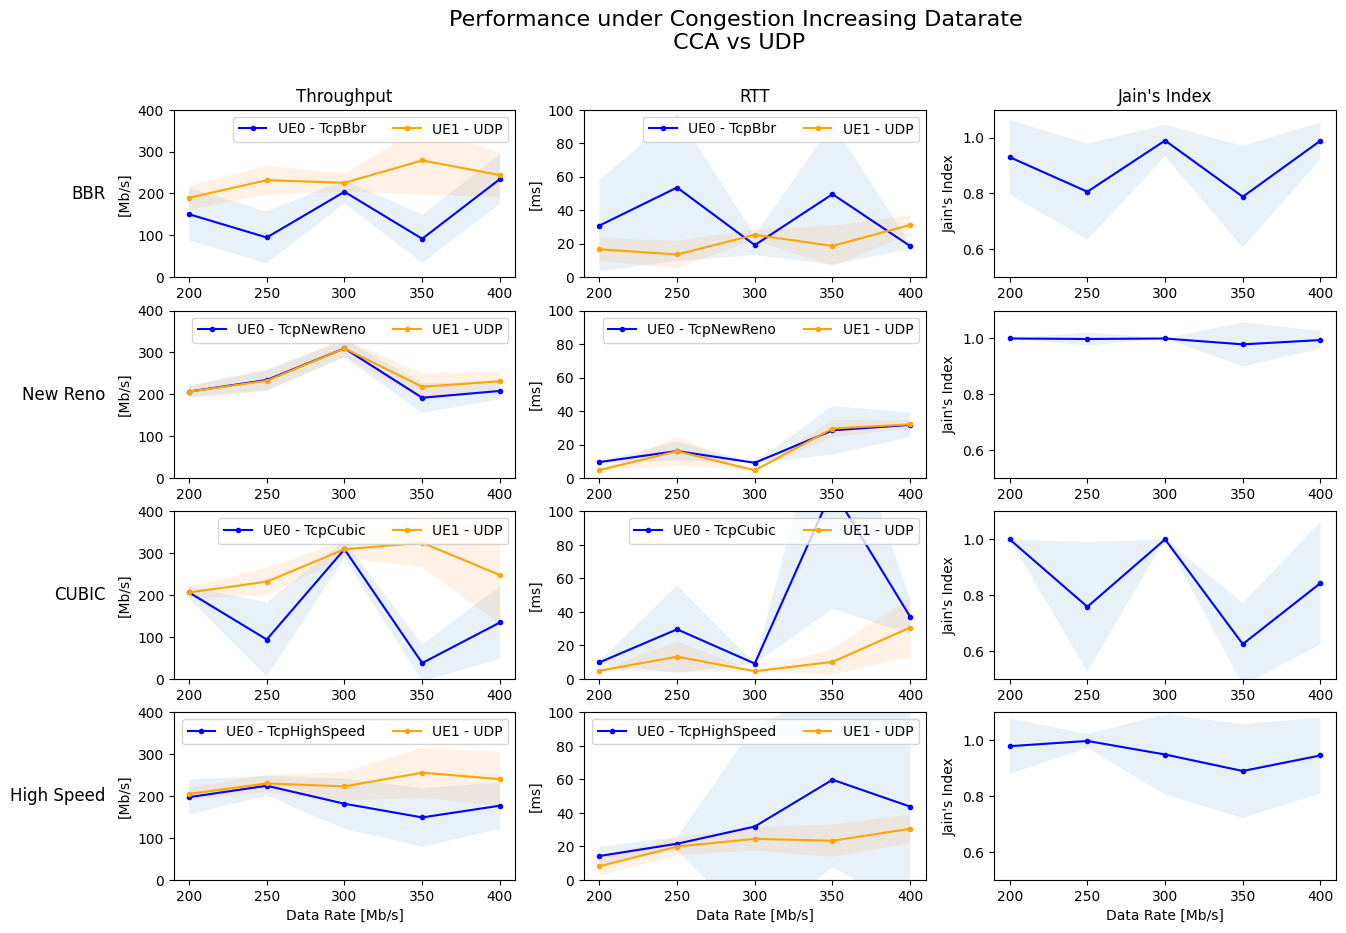

In [13]:
# CCA vs UDP - AQM None
DEBUG=0
TcpBbr = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-400',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-500',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-700',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-800',
]
TcpNewReno = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-400',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-500',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-700',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-800',
]
TcpCubic = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-400',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-500',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-700',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-800',
]
TcpHighSpeed = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-400',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-500',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-700',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-800',
]
files = [[ 'BBR' , TcpBbr],
         [ 'New Reno', TcpNewReno],
         [ 'CUBIC', TcpCubic],
         [ 'High Speed', TcpHighSpeed ]
         ]
title = "Performance under Congestion Increasing Datarate\n CCA vs UDP"
graph_datarate( files, title)

CCA,200,250,300,350,400
BBR,-0.1036,0.3616,-0.3772,-0.3337,-0.6832
New Reno,0.0253,0.0026,-0.4245,0.0850,-0.0458
CUBIC,0.0483,2.6069,0.0952,2.6678,-0.8405
High Speed,-0.0280,0.0960,0.0473,0.0215,-0.0518


CCA,200,250,300,350,400
BBR,298.46,207.24,225.72,270.26,227.77
New Reno,358.65,504.06,343.79,225.28,350.61
CUBIC,133.41,233.38,240.28,193.80,349.96
High Speed,314.18,324.00,349.84,321.07,320.39


CCA,200,250,300,350,400
BBR,0.9162,0.7579,0.7963,0.9073,0.7451
New Reno,0.9938,0.9999,0.8590,0.8980,0.9900
CUBIC,0.6413,0.6346,0.7007,0.7150,0.7302
High Speed,0.9686,0.9371,0.9729,0.9444,0.9903


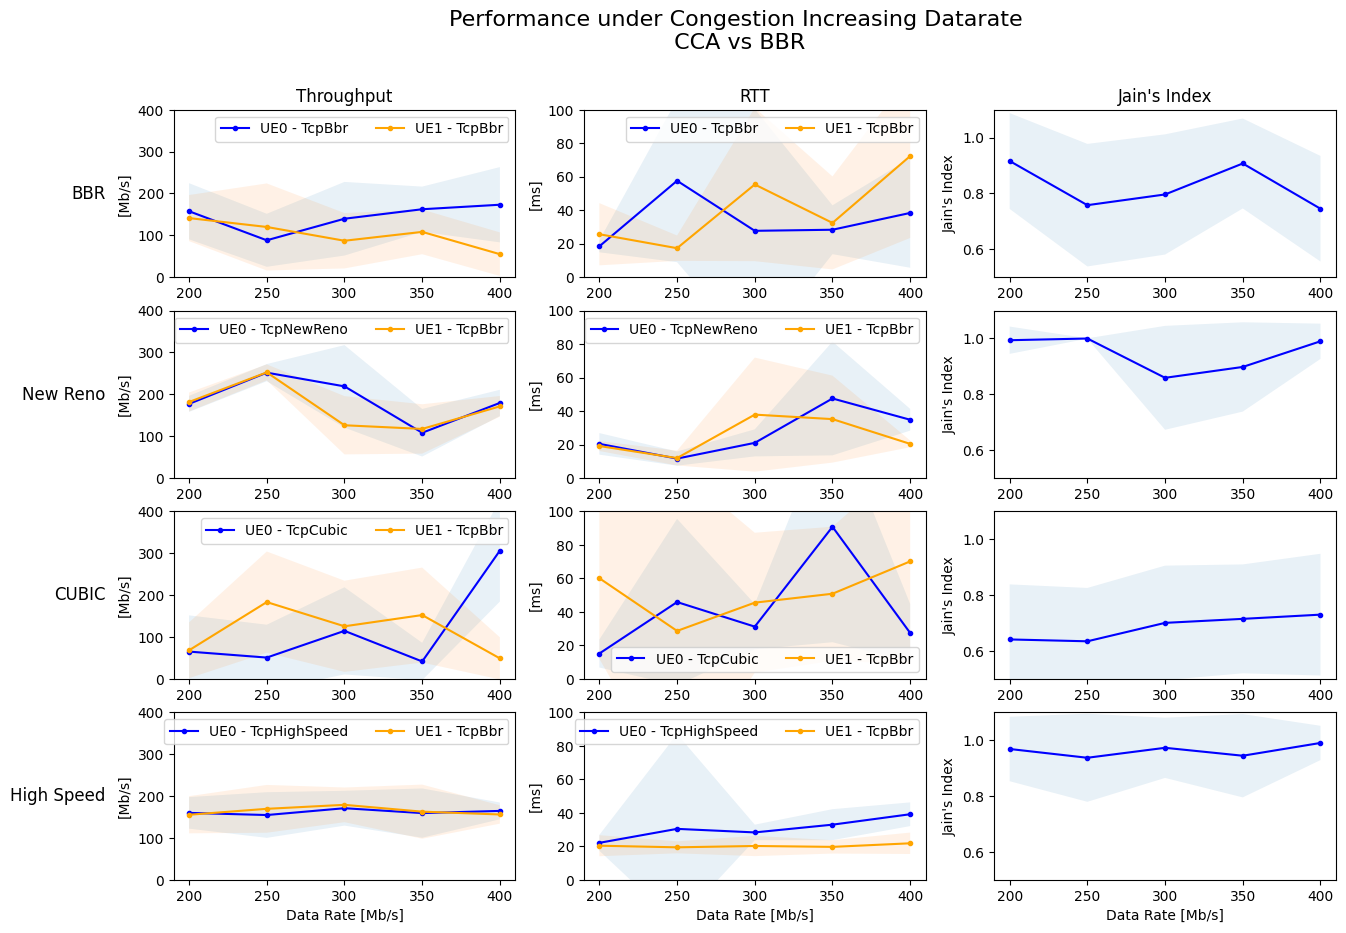

In [14]:
# AQM vs BBR - AQM None
DEBUG=0
TcpBbr = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-TcpBbr-UDP-E-200-UE_1_1_0-AQM_None-0_60-400',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-TcpBbr-UDP-E-200-UE_1_1_0-AQM_None-0_60-500',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-TcpBbr-UDP-E-200-UE_1_1_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-TcpBbr-UDP-E-200-UE_1_1_0-AQM_None-0_60-700',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-TcpBbr-UDP-E-200-UE_1_1_0-AQM_None-0_60-800',
]
TcpNewReno = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-TcpBbr-UDP-E-200-UE_1_1_0-AQM_None-0_60-400',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-TcpBbr-UDP-E-200-UE_1_1_0-AQM_None-0_60-500',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-TcpBbr-UDP-E-200-UE_1_1_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-TcpBbr-UDP-E-200-UE_1_1_0-AQM_None-0_60-700',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-TcpBbr-UDP-E-200-UE_1_1_0-AQM_None-0_60-800',
]
TcpCubic = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-TcpBbr-UDP-E-200-UE_1_1_0-AQM_None-0_60-400',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-TcpBbr-UDP-E-200-UE_1_1_0-AQM_None-0_60-500',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-TcpBbr-UDP-E-200-UE_1_1_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-TcpBbr-UDP-E-200-UE_1_1_0-AQM_None-0_60-700',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-TcpBbr-UDP-E-200-UE_1_1_0-AQM_None-0_60-800',
]
TcpHighSpeed = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-TcpBbr-UDP-E-200-UE_1_1_0-AQM_None-0_60-400',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-TcpBbr-UDP-E-200-UE_1_1_0-AQM_None-0_60-500',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-TcpBbr-UDP-E-200-UE_1_1_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-TcpBbr-UDP-E-200-UE_1_1_0-AQM_None-0_60-700',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-TcpBbr-UDP-E-200-UE_1_1_0-AQM_None-0_60-800',
]
files = [[ 'BBR' , TcpBbr],
         [ 'New Reno', TcpNewReno],
         [ 'CUBIC', TcpCubic],
         [ 'High Speed', TcpHighSpeed ]
         ]
title = "Performance under Congestion Increasing Datarate\n CCA vs BBR"
graph_datarate( files, title)


CCA,200,250,300,350,400
BBR,-0.3824,-0.5937,-0.4283,-0.8173,-0.4093
New Reno,-0.7927,-0.6261,-0.4399,0.2812,-0.7823
CUBIC,0.0009,0.4599,0.9484,-0.3068,0.0152
High Speed,-0.7973,-0.2720,-0.5649,-0.0954,-0.8112


CCA,200,250,300,350,400
BBR,292.22,239.68,264.14,230.16,291.03
New Reno,249.25,313.21,276.18,320.47,307.86
CUBIC,257.68,164.30,149.47,110.36,372.84
High Speed,235.34,280.44,307.65,312.67,283.97


CCA,200,250,300,350,400
BBR,0.7563,0.6281,0.7505,0.6865,0.8775
New Reno,0.6286,0.7416,0.8008,0.9640,0.7357
CUBIC,0.9675,0.8965,0.7253,0.6537,0.9998
High Speed,0.6670,0.8496,0.7934,0.9784,0.7108


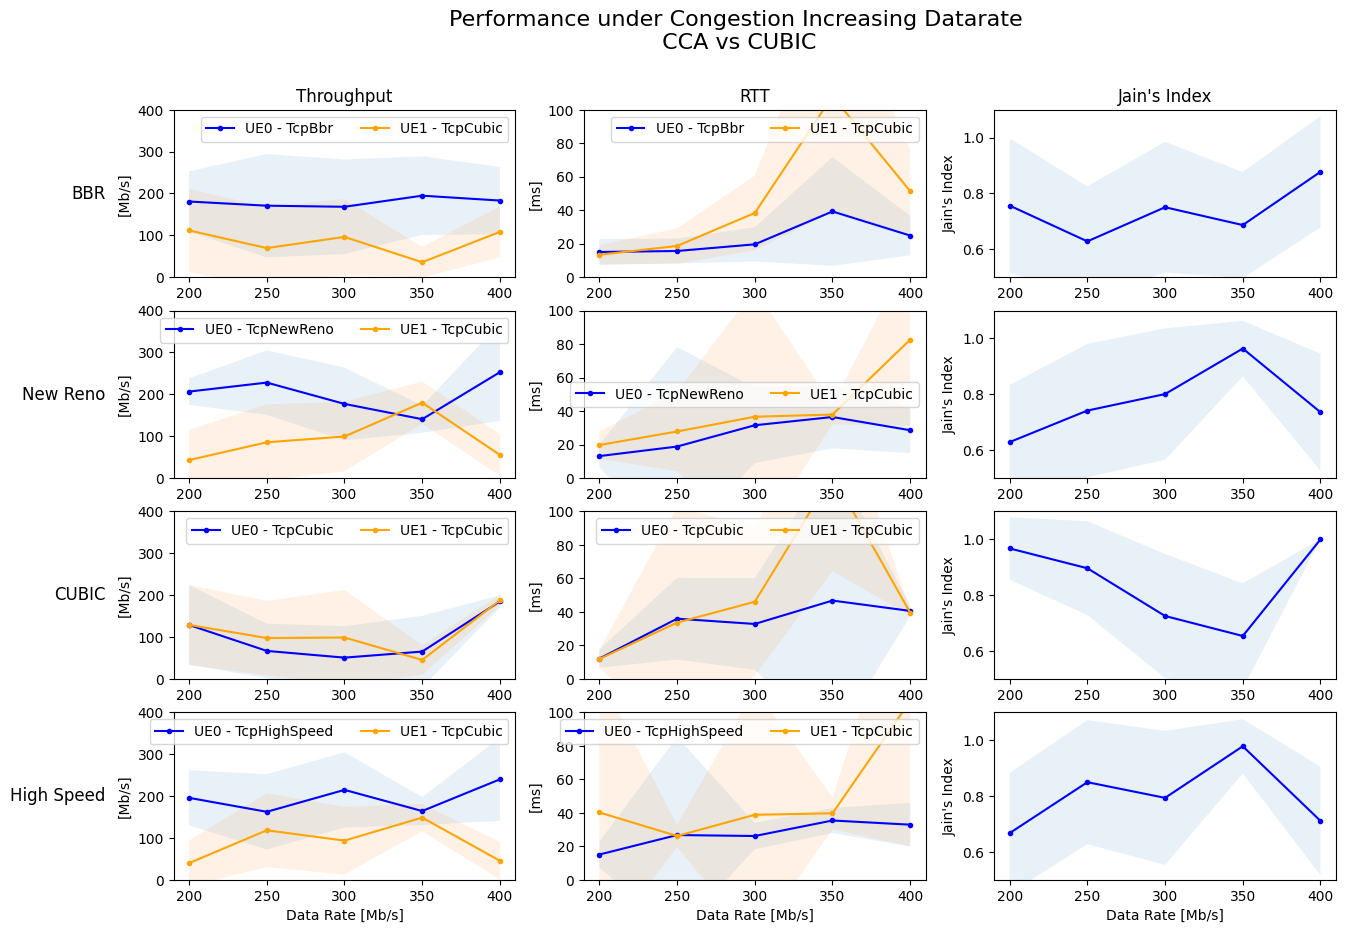

In [15]:
# AQM vs Cubic - AQM None
DEBUG=0
TcpBbr = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-TcpCubic-UDP-E-200-UE_1_1_0-AQM_None-0_60-400',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-TcpCubic-UDP-E-200-UE_1_1_0-AQM_None-0_60-500',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-TcpCubic-UDP-E-200-UE_1_1_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-TcpCubic-UDP-E-200-UE_1_1_0-AQM_None-0_60-700',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-TcpCubic-UDP-E-200-UE_1_1_0-AQM_None-0_60-800',
]
TcpNewReno = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-TcpCubic-UDP-E-200-UE_1_1_0-AQM_None-0_60-400',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-TcpCubic-UDP-E-200-UE_1_1_0-AQM_None-0_60-500',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-TcpCubic-UDP-E-200-UE_1_1_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-TcpCubic-UDP-E-200-UE_1_1_0-AQM_None-0_60-700',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-TcpCubic-UDP-E-200-UE_1_1_0-AQM_None-0_60-800',
]
TcpCubic = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-TcpCubic-UDP-E-200-UE_1_1_0-AQM_None-0_60-400',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-TcpCubic-UDP-E-200-UE_1_1_0-AQM_None-0_60-500',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-TcpCubic-UDP-E-200-UE_1_1_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-TcpCubic-UDP-E-200-UE_1_1_0-AQM_None-0_60-700',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-TcpCubic-UDP-E-200-UE_1_1_0-AQM_None-0_60-800',
]
TcpHighSpeed = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-TcpCubic-UDP-E-200-UE_1_1_0-AQM_None-0_60-400',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-TcpCubic-UDP-E-200-UE_1_1_0-AQM_None-0_60-500',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-TcpCubic-UDP-E-200-UE_1_1_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-TcpCubic-UDP-E-200-UE_1_1_0-AQM_None-0_60-700',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-TcpCubic-UDP-E-200-UE_1_1_0-AQM_None-0_60-800',
]
files = [[ 'BBR' , TcpBbr],
         [ 'New Reno', TcpNewReno],
         [ 'CUBIC', TcpCubic],
         [ 'High Speed', TcpHighSpeed ]
         ]
title = "Performance under Congestion Increasing Datarate\n CCA vs CUBIC"
graph_datarate( files, title)


CCA,200,250,300,350,400
BBR,1.9380,0.0381,-0.3976,0.0945,0.0759
New Reno,0.0200,0.0441,0.1004,0.1155,-0.0568
CUBIC,1.5345,0.1941,-0.4435,-0.0678,-0.7496
High Speed,-0.0377,-0.0218,0.1022,-0.1214,0.6938


CCA,200,250,300,350,400
BBR,194.49,387.91,179.49,347.99,446.48
New Reno,345.42,324.36,317.47,331.49,350.67
CUBIC,250.47,275.25,249.74,292.46,262.91
High Speed,341.24,341.41,377.17,342.35,364.50


CCA,200,250,300,350,400
BBR,0.7828,0.9910,0.7141,0.9877,0.9880
New Reno,0.9998,0.9975,0.9753,0.9908,0.9974
CUBIC,0.8023,0.9473,0.7744,0.9415,0.6647
High Speed,0.9990,0.9990,0.9764,0.9775,0.9154


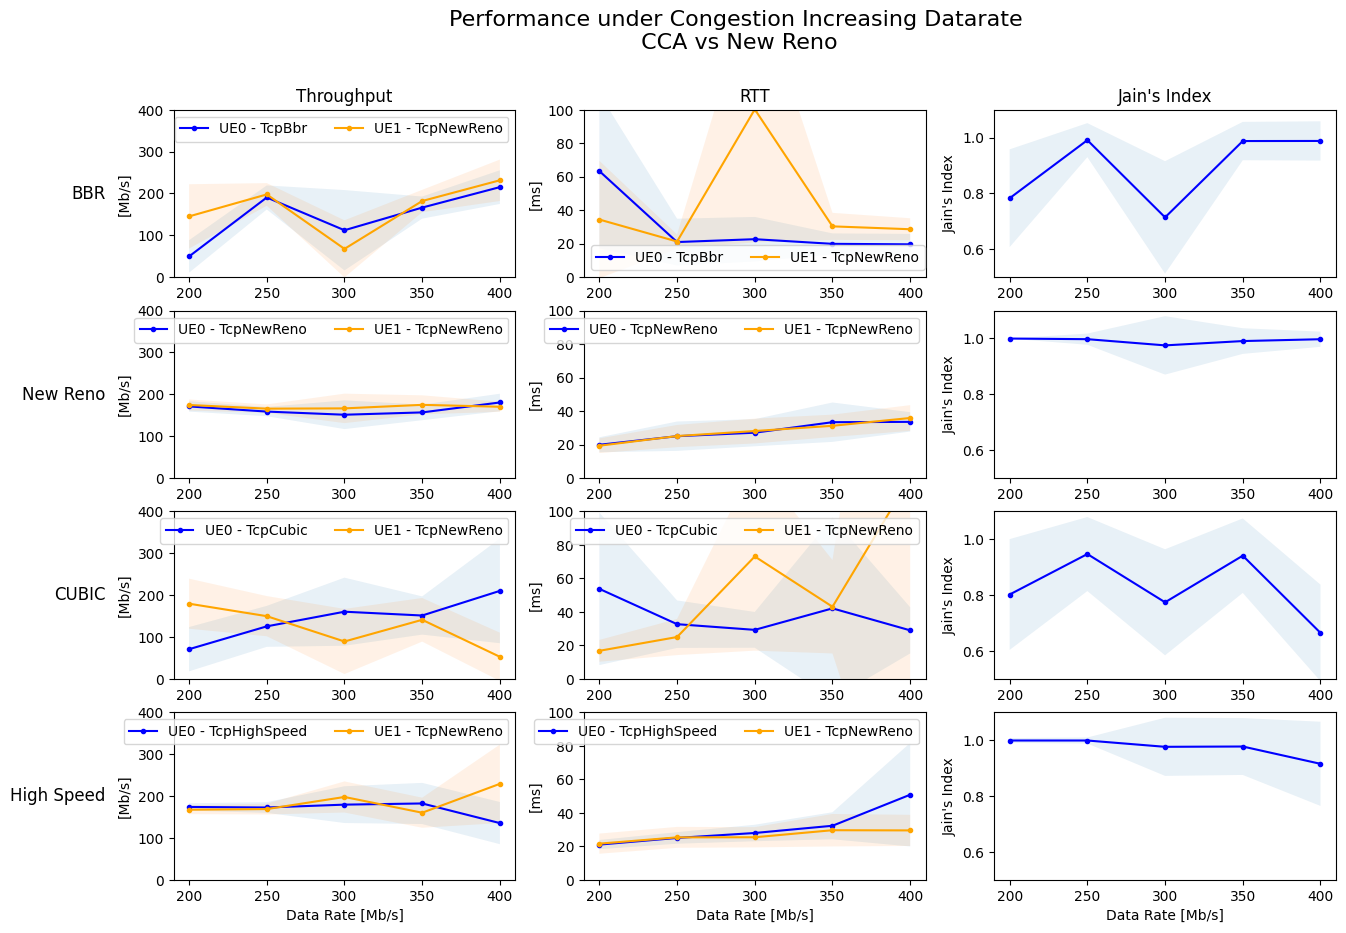

In [16]:
# AQM vs New Reno - AQM None
DEBUG=0
TcpBbr = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-TcpNewReno-UDP-E-200-UE_1_1_0-AQM_None-0_60-400',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-TcpNewReno-UDP-E-200-UE_1_1_0-AQM_None-0_60-500',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-TcpNewReno-UDP-E-200-UE_1_1_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-TcpNewReno-UDP-E-200-UE_1_1_0-AQM_None-0_60-700',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-TcpNewReno-UDP-E-200-UE_1_1_0-AQM_None-0_60-800',
]
TcpNewReno = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-TcpNewReno-UDP-E-200-UE_1_1_0-AQM_None-0_60-400',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-TcpNewReno-UDP-E-200-UE_1_1_0-AQM_None-0_60-500',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-TcpNewReno-UDP-E-200-UE_1_1_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-TcpNewReno-UDP-E-200-UE_1_1_0-AQM_None-0_60-700',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-TcpNewReno-UDP-E-200-UE_1_1_0-AQM_None-0_60-800',
]
TcpCubic = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-TcpNewReno-UDP-E-200-UE_1_1_0-AQM_None-0_60-400',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-TcpNewReno-UDP-E-200-UE_1_1_0-AQM_None-0_60-500',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-TcpNewReno-UDP-E-200-UE_1_1_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-TcpNewReno-UDP-E-200-UE_1_1_0-AQM_None-0_60-700',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-TcpNewReno-UDP-E-200-UE_1_1_0-AQM_None-0_60-800',
]
TcpHighSpeed = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-TcpNewReno-UDP-E-200-UE_1_1_0-AQM_None-0_60-400',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-TcpNewReno-UDP-E-200-UE_1_1_0-AQM_None-0_60-500',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-TcpNewReno-UDP-E-200-UE_1_1_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-TcpNewReno-UDP-E-200-UE_1_1_0-AQM_None-0_60-700',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-TcpNewReno-UDP-E-200-UE_1_1_0-AQM_None-0_60-800',
]
files = [[ 'BBR' , TcpBbr],
         [ 'New Reno', TcpNewReno],
         [ 'CUBIC', TcpCubic],
         [ 'High Speed', TcpHighSpeed ]
         ]
title = "Performance under Congestion Increasing Datarate\n CCA vs New Reno"
graph_datarate( files, title)

RED

In [17]:
def graph_aqm( files, title):
    text_legend = []
    fig, ax = plt.subplots(nrows = len(files), ncols = 3, figsize = (15, 10))
    table = {}
    table['rate'] = {}
    table['thr_agg'] = {}
    table['jain'] = {}
    for cca in range(len(files)):
        reg = load_data(files[cca][1])
        if DEBUG: print(reg)
        df = pd.DataFrame.from_dict(reg)
        df = df[df['zone'] == zone]
        if DEBUG: print(df)

        if cca == 0:
                table['rate']['CCA'] = []
                table['thr_agg']['CCA'] = []
                table['jain']['CCA'] = []
        table['rate']['CCA'].append(files[cca][0])
        table['thr_agg']['CCA'].append(files[cca][0])
        table['jain']['CCA'].append(files[cca][0])
        AQMs = df['aqm'].unique()
        
        for a in range(len(AQMs)):
            if cca == 0:
                table['rate'][AQMs[a]] = []
                table['thr_agg'][AQMs[a]] = []
                table['jain'][AQMs[a]] = []
            rate = df[(df['ue'] == 2) & (df['aqm'] ==  AQMs[a])]['thr_mean'].values[0] / df[(df['ue'] == 1) & (df['aqm'] ==  AQMs[a])]['thr_mean'].values[0]
            rate = rate -1
            table['rate'][AQMs[a]].append(rate)
            thr_agg = df[(df['ue'] == 0) & (df['aqm'] ==  AQMs[a])]['thr_mean'].values[0]
            table['thr_agg'][AQMs[a]].append(thr_agg)
            jain = df[(df['ue'] == 0) & (df['aqm'] ==  AQMs[a])]['jain_mean'].values[0]
            table['jain'][AQMs[a]].append(jain)
            if DEBUG: print (f'cca: {files[cca][0]}, aqm: {AQMs[a]}, rate: {rate}\n')

        for ue in range(df['ue'].max()):
            # Thropughput
            df[df['ue'] == ue + 1].set_index('aqm')['thr_mean'].plot(ax = ax[cca][0],
                                                                                        marker = '.',
                                                                                        color = colors[ue])
            ax[cca][0].fill_between(df[df['ue'] == ue + 1]['aqm'],
                            df[df['ue'] == ue + 1]['thr_mean'] - df[df['ue'] == ue + 1]['thr_std'],
                            df[df['ue'] == ue + 1]['thr_mean'] + df[df['ue'] == ue + 1]['thr_std'],
                            alpha = 0.1,
                            label='_nolegend_')
            # RTT
            df[df['ue'] == ue + 1].set_index('aqm')['rtt_mean'].plot(ax = ax[cca][1],
                                                                                        marker = '.',
                                                                                        color = colors[ue])
            ax[cca][1].fill_between(df[df['ue'] == ue + 1]['aqm'],
                            df[df['ue'] == ue + 1]['rtt_mean'] - df[df['ue'] == ue + 1]['rtt_std'],
                            df[df['ue'] == ue + 1]['rtt_mean'] + df[df['ue'] == ue + 1]['rtt_std'],
                            alpha = 0.1,
                            label='_nolegend_')
        

        # Jain Index
        df[df['ue'] == 0].set_index('aqm')['jain_mean'].plot(ax = ax[cca][2],
                                                                marker = '.',
                                                                color=colors[0])
        ax[cca][2].fill_between(df[df['ue']== 0]['aqm'],
                        df[df['ue'] == 0]['jain_mean'] - df[df['ue'] == 0]['jain_std'],
                        df[df['ue'] == 0]['jain_mean'] + df[df['ue'] == 0]['jain_std'],
                        alpha = 0.1,
                        label='_nolegend_')


        df['legend'] = 'UE' + df['ue'].astype(str) + ' - ' + df['flowtype']
        text_legend = [  str(i)  for i in df[df['ue'] != 0]['legend'].unique()]
        ax[cca][0].legend(text_legend, ncol = 2)
        ax[cca][1].legend(text_legend, ncol = 2)

        ax[cca][0].set_xlabel("")
        ax[cca][1].set_xlabel("")
        ax[cca][2].set_xlabel("")
        
        ax[cca][0].set_ylabel("[Mb/s]")
        ax[cca][1].set_ylabel("[ms]")
        ax[cca][2].set_ylabel("Jain\'s Index")

        ax[cca][0].set_ylim(limits['thr'])
        ax[cca][1].set_ylim(limits['rtt'])
        ax[cca][2].set_ylim(limits['jain'])


        # ax[cca][0].set_xticks([]) 
        # ax[cca][0].set_xticklabels(df['aqm'].unique()) 
        # ax[cca][1].set_xticks([]) 
        # ax[cca][1].set_xticklabels(df['aqm'].unique()) 

        # ax[cca][0].set_xlim([df['datarate'].min() - 10 , df['datarate'].max() +10])
        # ax[cca][1].set_xlim([df['datarate'].min() - 10 , df['datarate'].max() +10])
        
        
    for col in range(3):
        ax[cca][col].set_xlabel("AQM")
    
    fig.suptitle(title, fontsize=16)
    cols_titles = ['Throughput', 'RTT', 'Jain\'s Index']
    for axe, col in zip(ax[0], cols_titles):
        axe.set_title(col)

    row_titles = [i[0]  for i in files]
    pad = 5 # in points
    for axe, row in zip(ax[:,0], row_titles):
        axe.annotate(row, xy=(0, 0.5), xytext=(-axe.yaxis.labelpad - pad, 0),
                    xycoords=axe.yaxis.label, textcoords='offset points',
                    size='large', ha='right', va='center')

    display(pd.DataFrame.from_dict(table['rate']).style\
            .format(precision=4)\
            .hide()\
            .set_caption("Throughput user rate"))
    display(pd.DataFrame.from_dict(table['thr_agg']).style\
            .format(precision=2)\
            .hide()\
            .set_caption("Aggregated Throughput"))
    display(pd.DataFrame.from_dict(table['jain']).style\
            .format(precision=4)\
            .hide()\
            .set_caption("Jain\'s Index"))

    plt.show()

CCA,None,RED90,RED80,RED70
BBR,0.1054,0.1308,0.1588,0.0601
New Reno,-0.0001,0.5797,0.0061,0.5386
CUBIC,-0.0001,121.9463,0.6060,0.2652
High Speed,0.2288,-0.0001,0.4859,0.0887


CCA,None,RED90,RED80,RED70
BBR,428.16,427.28,425.32,465.40
New Reno,619.36,378.69,402.77,394.24
CUBIC,619.36,309.36,386.93,512.72
High Speed,403.51,619.36,416.94,532.31


CCA,None,RED90,RED80,RED70
BBR,0.9896,0.9886,0.9880,0.9916
New Reno,1.0000,0.9113,0.9969,0.9018
CUBIC,1.0000,0.6232,0.8845,0.9065
High Speed,0.9488,1.0000,0.9032,0.9747


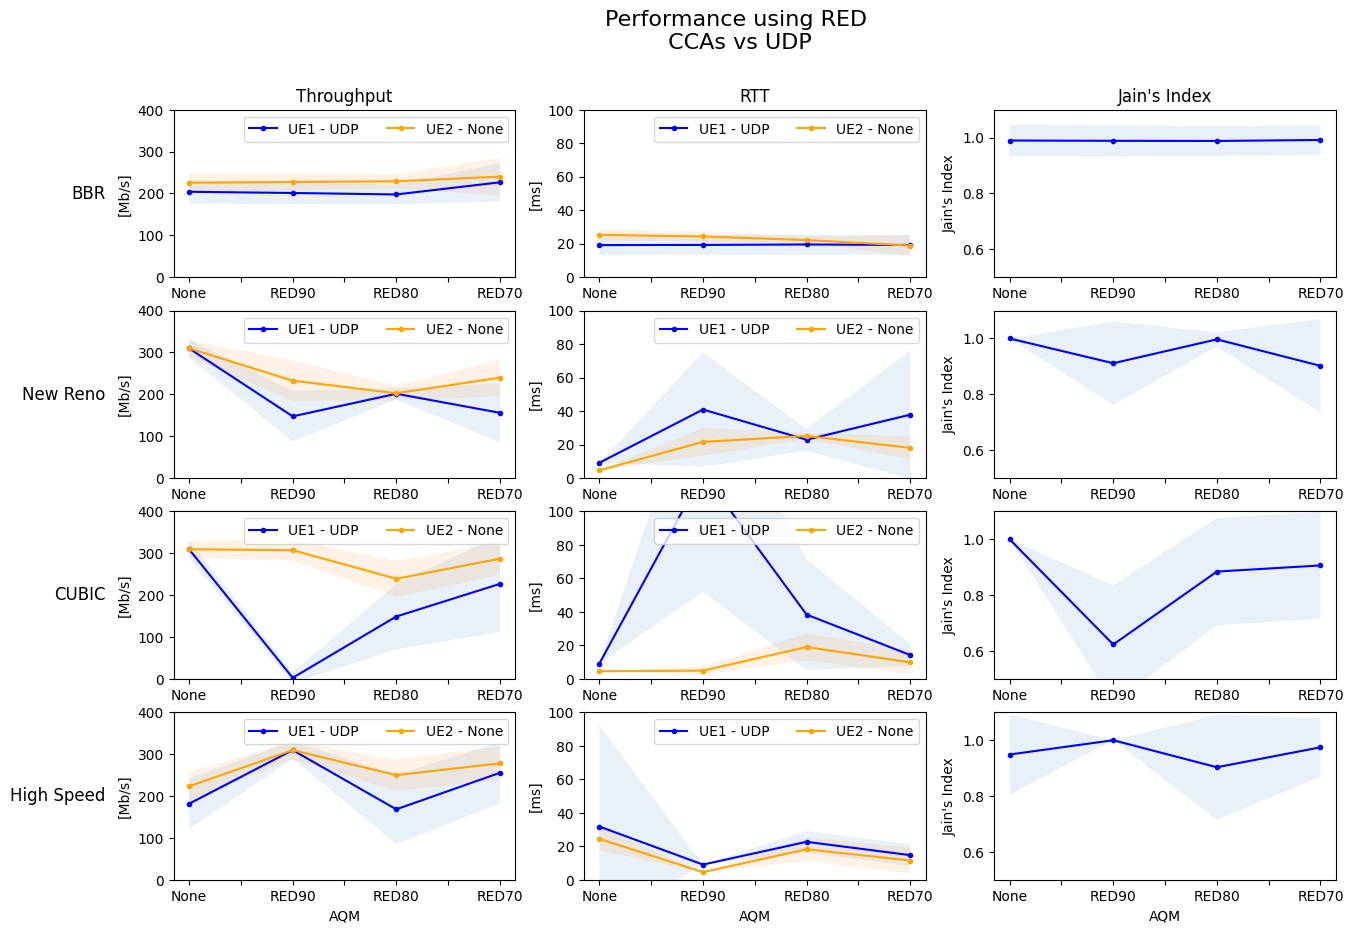

In [18]:
# CCA vs UDP - AQM RED
DEBUG=0
TcpBbr = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-UDP-UDP-E-200-UE_1_1_0-AQM_RED90-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-UDP-UDP-E-200-UE_1_1_0-AQM_RED80-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-UDP-UDP-E-200-UE_1_1_0-AQM_RED70-0_60-600',
]
TcpNewReno = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-UDP-UDP-E-200-UE_1_1_0-AQM_RED90-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-UDP-UDP-E-200-UE_1_1_0-AQM_RED80-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-UDP-UDP-E-200-UE_1_1_0-AQM_RED70-0_60-600',
]
TcpCubic = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-UDP-UDP-E-200-UE_1_1_0-AQM_RED90-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-UDP-UDP-E-200-UE_1_1_0-AQM_RED80-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-UDP-UDP-E-200-UE_1_1_0-AQM_RED70-0_60-600',
]
TcpHighSpeed = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-UDP-UDP-E-200-UE_1_1_0-AQM_RED90-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-UDP-UDP-E-200-UE_1_1_0-AQM_RED80-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-UDP-UDP-E-200-UE_1_1_0-AQM_RED70-0_60-600',
]
files = [[ 'BBR' , TcpBbr],
         [ 'New Reno', TcpNewReno],
         [ 'CUBIC', TcpCubic],
         [ 'High Speed', TcpHighSpeed ]
         ]
title = "Performance using RED\n CCAs vs UDP"
graph_aqm( files, title)



CCA,None,RED90,RED80,RED70
BBR,-0.3772,0.0071,0.0385,-0.0962
New Reno,-0.4245,-0.0080,-0.0446,0.0100
CUBIC,0.0952,5.6581,0.8291,-0.7794
High Speed,0.0473,0.0454,0.0494,-0.0856


CCA,None,RED90,RED80,RED70
BBR,225.72,348.37,237.92,244.00
New Reno,343.79,315.25,320.28,299.95
CUBIC,240.28,189.24,319.90,187.34
High Speed,349.84,321.21,321.72,286.31


CCA,None,RED90,RED80,RED70
BBR,0.7963,0.9979,0.8299,0.8744
New Reno,0.8590,0.9947,0.9682,0.9783
CUBIC,0.7007,0.5722,0.7931,0.6986
High Speed,0.9729,0.9051,0.8758,0.8720


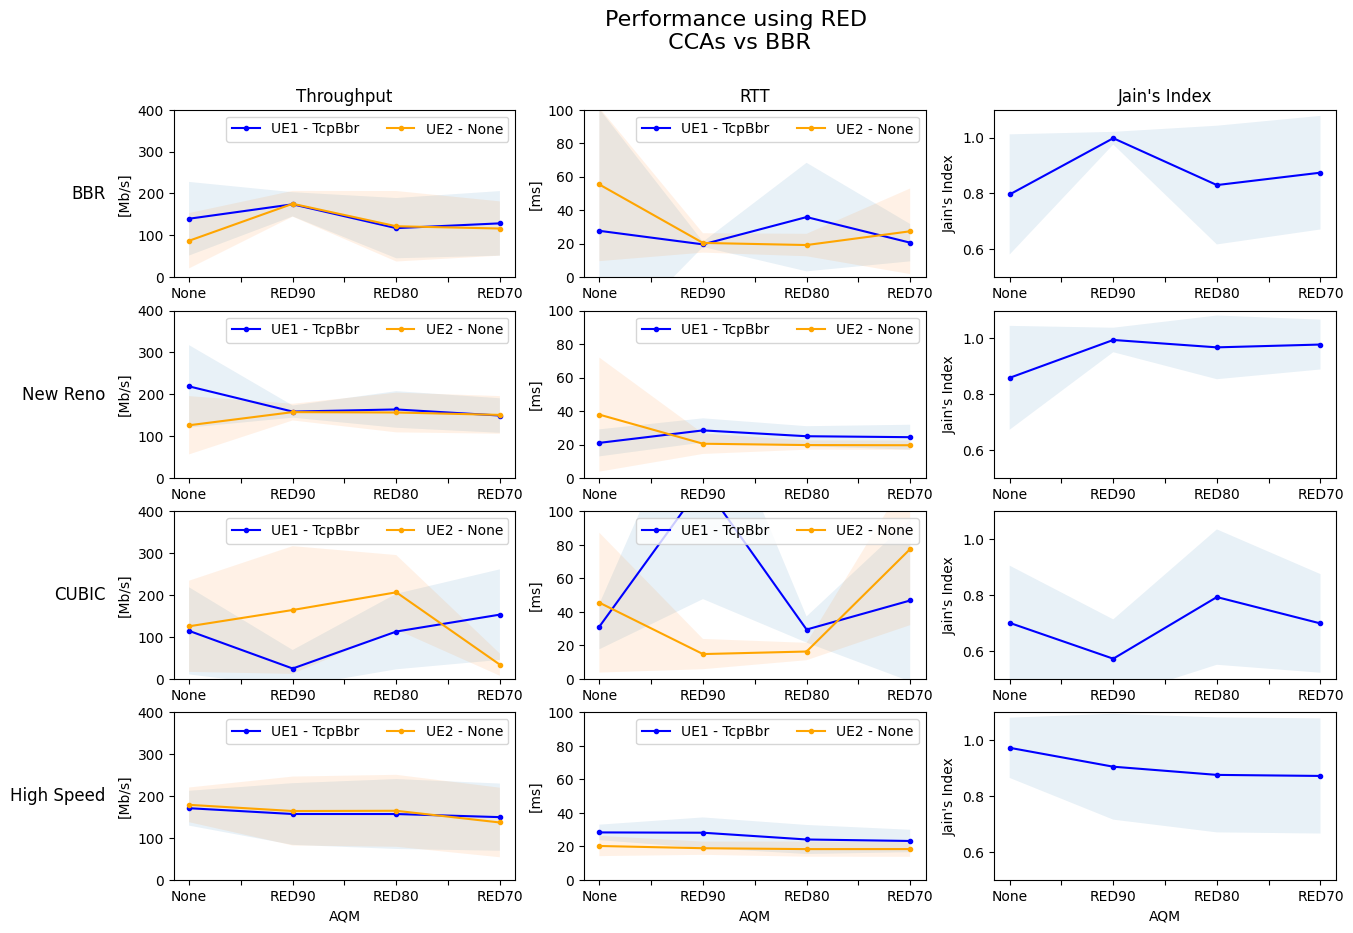

In [19]:
# CCA vs BBR - AQM RED
DEBUG=0
TcpBbr = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-TcpBbr-UDP-E-200-UE_1_1_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-TcpBbr-UDP-E-200-UE_1_1_0-AQM_RED90-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-TcpBbr-UDP-E-200-UE_1_1_0-AQM_RED80-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-TcpBbr-UDP-E-200-UE_1_1_0-AQM_RED70-0_60-600',
]
TcpNewReno = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-TcpBbr-UDP-E-200-UE_1_1_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-TcpBbr-UDP-E-200-UE_1_1_0-AQM_RED90-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-TcpBbr-UDP-E-200-UE_1_1_0-AQM_RED80-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-TcpBbr-UDP-E-200-UE_1_1_0-AQM_RED70-0_60-600',
]
TcpCubic = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-TcpBbr-UDP-E-200-UE_1_1_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-TcpBbr-UDP-E-200-UE_1_1_0-AQM_RED90-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-TcpBbr-UDP-E-200-UE_1_1_0-AQM_RED80-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-TcpBbr-UDP-E-200-UE_1_1_0-AQM_RED70-0_60-600',
]
TcpHighSpeed = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-TcpBbr-UDP-E-200-UE_1_1_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-TcpBbr-UDP-E-200-UE_1_1_0-AQM_RED90-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-TcpBbr-UDP-E-200-UE_1_1_0-AQM_RED80-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-TcpBbr-UDP-E-200-UE_1_1_0-AQM_RED70-0_60-600',
]
files = [[ 'BBR' , TcpBbr],
         [ 'New Reno', TcpNewReno],
         [ 'CUBIC', TcpCubic],
         [ 'High Speed', TcpHighSpeed ]
         ]

title = "Performance using RED\n CCAs vs BBR"
graph_aqm( files, title)


CCA,None,RED90,RED80,RED70
BBR,-0.4283,-0.2496,-0.0244,0.2992
New Reno,-0.4399,-0.0941,-0.2866,-0.1423
CUBIC,0.9484,0.2143,0.9682,-0.7085
High Speed,-0.5649,-0.1050,0.5062,-0.5023


CCA,None,RED90,RED80,RED70
BBR,264.14,314.13,221.75,205.51
New Reno,276.18,307.46,306.98,347.82
CUBIC,149.47,262.17,214.59,214.22
High Speed,307.65,296.90,168.49,220.95


CCA,None,RED90,RED80,RED70
BBR,0.7505,0.8723,0.7766,0.7701
New Reno,0.8008,0.9474,0.8982,0.9543
CUBIC,0.7253,0.8852,0.8257,0.7515
High Speed,0.7934,0.8981,0.7204,0.7352


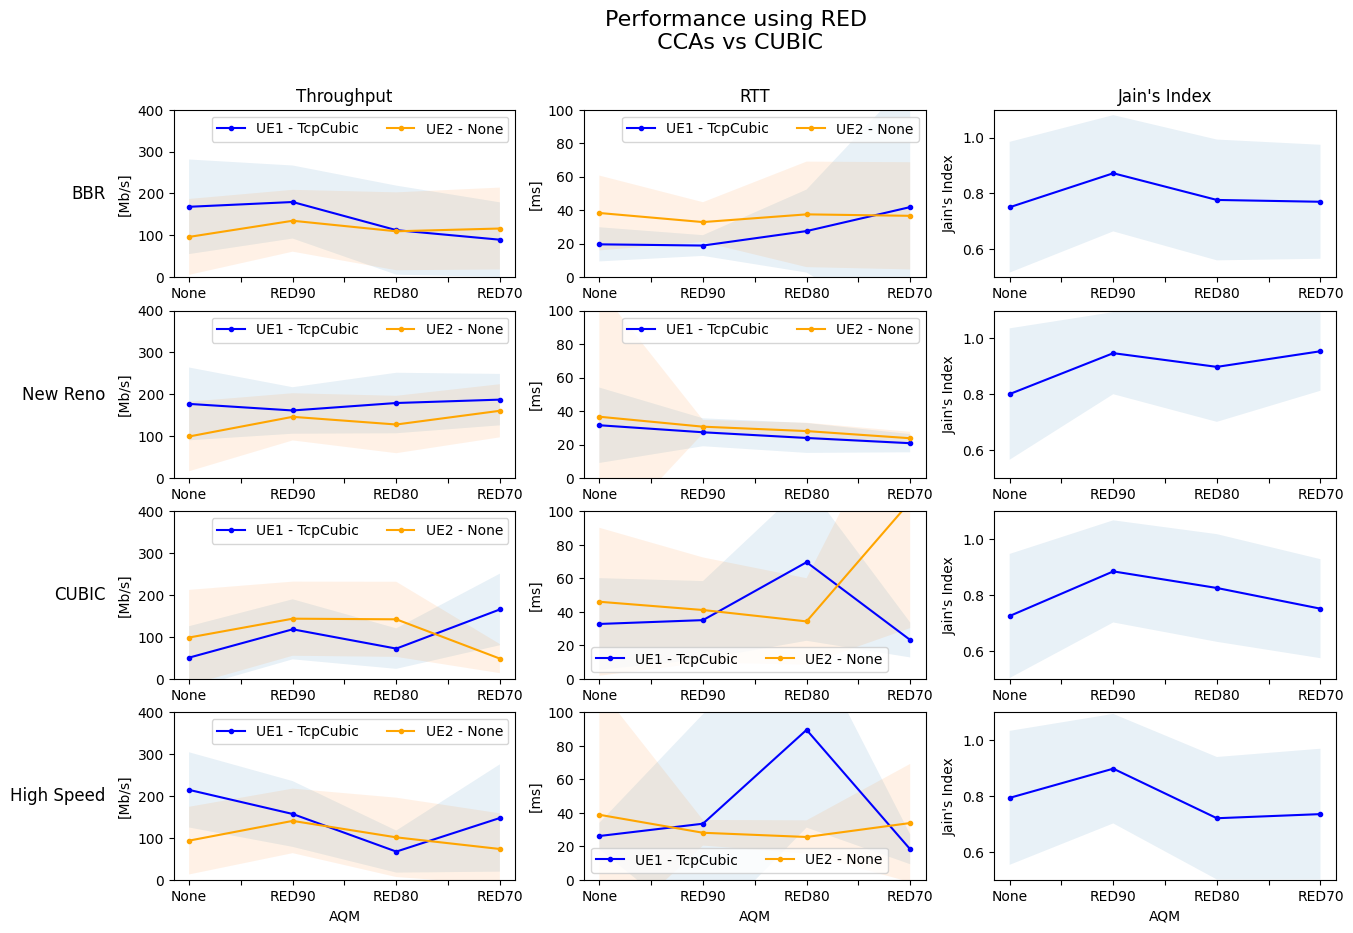

In [20]:
# CCA vs Cubic - AQM RED
DEBUG=0
TcpBbr = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-TcpCubic-UDP-E-200-UE_1_1_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-TcpCubic-UDP-E-200-UE_1_1_0-AQM_RED90-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-TcpCubic-UDP-E-200-UE_1_1_0-AQM_RED80-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-TcpCubic-UDP-E-200-UE_1_1_0-AQM_RED70-0_60-600',
]
TcpNewReno = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-TcpCubic-UDP-E-200-UE_1_1_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-TcpCubic-UDP-E-200-UE_1_1_0-AQM_RED90-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-TcpCubic-UDP-E-200-UE_1_1_0-AQM_RED80-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-TcpCubic-UDP-E-200-UE_1_1_0-AQM_RED70-0_60-600',
]
TcpCubic = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-TcpCubic-UDP-E-200-UE_1_1_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-TcpCubic-UDP-E-200-UE_1_1_0-AQM_RED90-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-TcpCubic-UDP-E-200-UE_1_1_0-AQM_RED80-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-TcpCubic-UDP-E-200-UE_1_1_0-AQM_RED70-0_60-600',
]
TcpHighSpeed = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-TcpCubic-UDP-E-200-UE_1_1_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-TcpCubic-UDP-E-200-UE_1_1_0-AQM_RED90-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-TcpCubic-UDP-E-200-UE_1_1_0-AQM_RED80-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-TcpCubic-UDP-E-200-UE_1_1_0-AQM_RED70-0_60-600',
]
files = [[ 'BBR' , TcpBbr],
         [ 'New Reno', TcpNewReno],
         [ 'CUBIC', TcpCubic],
         [ 'High Speed', TcpHighSpeed ]
         ]

title = "Performance using RED\n CCAs vs CUBIC"
graph_aqm( files, title)


CCA,None,RED90,RED80,RED70
BBR,-0.3976,0.7920,0.1784,0.2304
New Reno,0.1004,2.8233,0.1030,0.1429
CUBIC,-0.4435,0.8750,1.0547,0.5384
High Speed,0.1022,-0.3803,-0.0448,0.2985


CCA,None,RED90,RED80,RED70
BBR,179.49,286.64,322.34,346.33
New Reno,317.47,120.80,354.12,356.45
CUBIC,249.74,329.59,276.02,311.37
High Speed,377.17,286.54,368.49,339.78


CCA,None,RED90,RED80,RED70
BBR,0.7141,0.8493,0.9702,0.9600
New Reno,0.9753,0.8060,0.9970,0.9776
CUBIC,0.7744,0.8524,0.8540,0.8877
High Speed,0.9764,0.9136,0.9985,0.9450


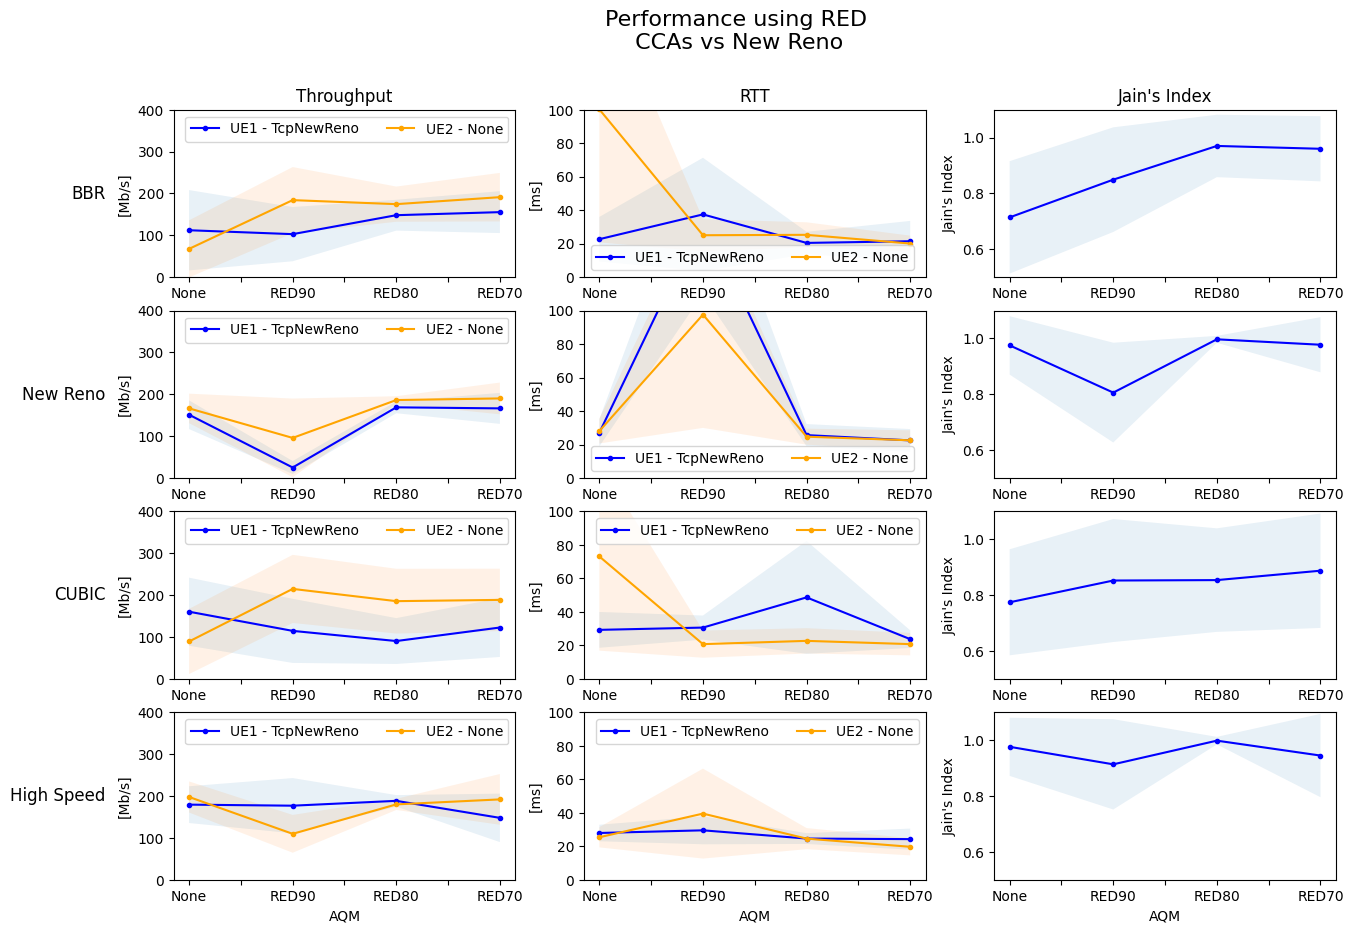

In [21]:
# CCA vs New Reno - AQM RED
DEBUG=0
TcpBbr = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-TcpNewReno-UDP-E-200-UE_1_1_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-TcpNewReno-UDP-E-200-UE_1_1_0-AQM_RED90-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-TcpNewReno-UDP-E-200-UE_1_1_0-AQM_RED80-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-TcpNewReno-UDP-E-200-UE_1_1_0-AQM_RED70-0_60-600',
]
TcpNewReno = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-TcpNewReno-UDP-E-200-UE_1_1_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-TcpNewReno-UDP-E-200-UE_1_1_0-AQM_RED90-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-TcpNewReno-UDP-E-200-UE_1_1_0-AQM_RED80-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-TcpNewReno-UDP-E-200-UE_1_1_0-AQM_RED70-0_60-600',
]
TcpCubic = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-TcpNewReno-UDP-E-200-UE_1_1_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-TcpNewReno-UDP-E-200-UE_1_1_0-AQM_RED90-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-TcpNewReno-UDP-E-200-UE_1_1_0-AQM_RED80-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-TcpNewReno-UDP-E-200-UE_1_1_0-AQM_RED70-0_60-600',
]
TcpHighSpeed = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-TcpNewReno-UDP-E-200-UE_1_1_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-TcpNewReno-UDP-E-200-UE_1_1_0-AQM_RED90-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-TcpNewReno-UDP-E-200-UE_1_1_0-AQM_RED80-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpHighSpeed-TcpNewReno-UDP-E-200-UE_1_1_0-AQM_RED70-0_60-600',
]
files = [[ 'BBR' , TcpBbr],
         [ 'New Reno', TcpNewReno],
         [ 'CUBIC', TcpCubic],
         [ 'High Speed', TcpHighSpeed ]
         ]

title = "Performance using RED\n CCAs vs New Reno"
graph_aqm( files, title)

OLD GRAPHS

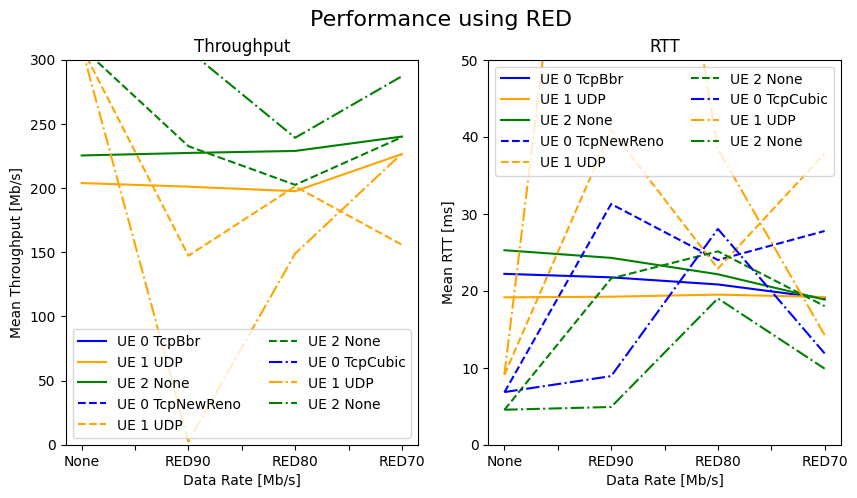

In [22]:
# AQM RED
DEBUG=0
Bbr = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-UDP-UDP-E-200-UE_1_1_0-AQM_RED90-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-UDP-UDP-E-200-UE_1_1_0-AQM_RED80-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-UDP-UDP-E-200-UE_1_1_0-AQM_RED70-0_60-600',
]
NewReno = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-UDP-UDP-E-200-UE_1_1_0-AQM_RED90-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-UDP-UDP-E-200-UE_1_1_0-AQM_RED80-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-UDP-UDP-E-200-UE_1_1_0-AQM_RED70-0_60-600',
]
Cubic = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-UDP-UDP-E-200-UE_1_1_0-AQM_RED90-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-UDP-UDP-E-200-UE_1_1_0-AQM_RED80-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpCubic-UDP-UDP-E-200-UE_1_1_0-AQM_RED70-0_60-600',
]
files = [Bbr, NewReno, Cubic ]


title = 'Throughput'
subtitle = 'CCA vs UDP'

text_legend = []
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
for cca in range(len(files)):
    reg = load_data(files[cca])
    if DEBUG: print(reg)
    df = pd.DataFrame.from_dict(reg)
    df = df[df['zone'] == zone]

    for ue in range(len(df['ue'].unique())):
        df[df['ue'] == df['ue'].unique()[ue]].set_index('aqm')['thr_mean'].plot(ax = ax[0],
                                                                                     color=colors[ue],
                                                                                     linestyle = linestyles[cca])
    df['legend'] = 'UE ' + df['ue'].astype(str) + ' ' + df['flowtype']
    legend = [  str(i)  for i in df['legend'].unique()]
    text_legend = text_legend + legend
ax[0].set_xlabel("Data Rate [Mb/s]")
ax[0].set_ylabel("Mean Throughput [Mb/s]")
ax[0].set_ylim([0 , 300])
# ax[0].set_xlim([df['datarate'].min() - 10 , df['datarate'].max() +10])
ax[0].legend(text_legend, ncol = 2)
ax[0].title.set_text(title)

title = 'RTT'
text_legend = []
for cca in range(len(files)):
    reg = load_data(files[cca])
    if DEBUG: print(reg)
    df = pd.DataFrame.from_dict(reg)
    df = df[df['zone'] == zone]
    for ue in range(len(df['ue'].unique())):
        df[df['ue'] == df['ue'].unique()[ue]].set_index('aqm')['rtt_mean'].plot(ax = ax[1],
                                                                                     color=colors[ue],
                                                                                     linestyle = linestyles[cca])
    df['legend'] = 'UE ' + df['ue'].astype(str) + ' ' + df['flowtype']
    legend = [  str(i)  for i in df['legend'].unique()]
    text_legend = text_legend + legend

fig.suptitle("Performance using RED", fontsize=16)
ax[1].set_xlabel("Data Rate [Mb/s]")
ax[1].set_ylabel("Mean RTT [ms]")
ax[1].set_ylim([0 , 50])
# ax[1].set_xlim([df['datarate'].min() - 10 , df['datarate'].max() +10])
ax[1].legend(text_legend, ncol = 2)
ax[1].title.set_text(title)

plt.show()

/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-400
[1, 1, 0]
['TcpBbr', 'UDP', 'UDP']
part-3
[('resampleperiod', '100'), ('simtime', '60'), ('initime', '0'), ('endtime', '60'), ('appstarttime', '0.2'), ('appendtime', '59.8'), ('nrtrace', '1'), ('tcptrace', '1'), ('flowtype', 'TCP'), ('flowtype1', 'TCP'), ('flowtype2', 'UDP'), ('flowtype3', 'UDP'), ('tcptypeid', 'TcpBbr'), ('tcptypeid1', 'TcpBbr'), ('tcptypeid2', 'UDP'), ('tcptypeid3', 'UDP'), ('frequency', '2.73e+10'), ('bandwidth', '2e+08'), ('serverid', '6'), ('serverid1', '6'), ('serverid2', '7'), ('serverid3', '8'), ('ip_net_server1', '172.16.1.0'), ('ip_net_server2', '172.16.2.0'), ('ip_net_server3', '172.16.3.0'), ('uen1', '1'), ('uen2', '1'), ('uen3', '0'), ('ip_mask_server', '255.255.255.0'), ('uenum', '2'), ('segmentsize', '1448'), ('rlcbuffer', '400000'), ('rlcbufferperc', '200'), ('servertype', 'Edge'), ('datarate', '200'), ('phydistro', '0'), ('aqm', 'None'

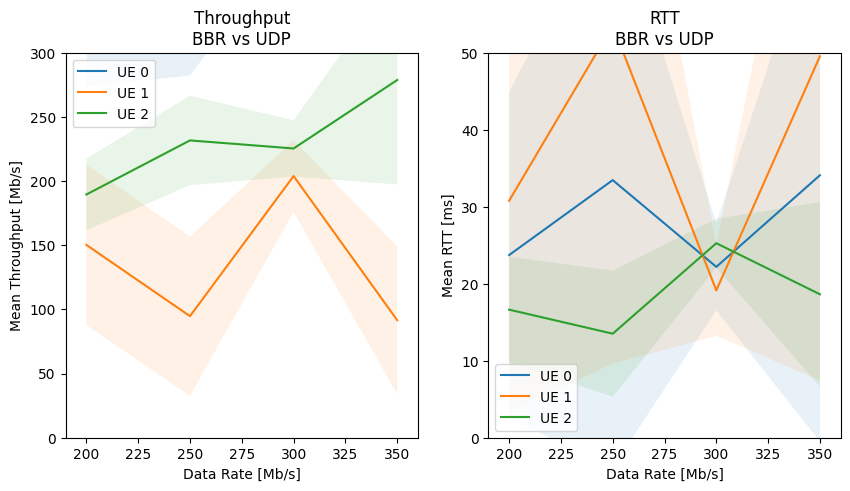

In [23]:
DEBUG=1
folders = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-400',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-500',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-700',
]
reg = load_data(folders)
if DEBUG: print(reg)

df = pd.DataFrame.from_dict(reg)
df = df[df['zone'] == zone]
if DEBUG: print(df)

title = 'Throughput'
subtitle = 'BBR vs UDP'
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
df.set_index('datarate').groupby('ue')['thr_mean'].plot(ax = ax[0])
for ue in df['ue'].unique():
    ax[0].fill_between(df[df['ue']== ue]['datarate'],
                       df[df['ue']== ue]['thr_mean'] - df[df['ue']== ue]['thr_std'],
                       df[df['ue']== ue]['thr_mean'] + df[df['ue']== ue]['thr_std'], alpha=0.1)

ax[0].set_xlabel("Data Rate [Mb/s]")
ax[0].set_ylabel("Mean Throughput [Mb/s]")
ax[0].set_ylim([0 , 300])
ax[0].set_xlim([df['datarate'].min() - 10 , df['datarate'].max() +10])
text_legend = [ 'UE ' + str(i)  for i in df['ue'].unique()]
ax[0].legend(text_legend)
ax[0].title.set_text(title + '\n' +subtitle)



title = 'RTT'
df.set_index('datarate').groupby('ue')['rtt_mean'].plot(ax = ax[1])
for ue in df['ue'].unique():
    ax[1].fill_between(df[df['ue']== ue]['datarate'],
                       df[df['ue']== ue]['rtt_mean'] - df[df['ue']== ue]['rtt_std'],
                       df[df['ue']== ue]['rtt_mean'] + df[df['ue']== ue]['rtt_std'], alpha=0.1)

ax[1].set_xlabel("Data Rate [Mb/s]")
ax[1].set_ylabel("Mean RTT [ms]")
ax[1].set_ylim([0 , 50])
ax[1].set_xlim([df['datarate'].min() - 10 , df['datarate'].max() +10])
text_legend = [ 'UE ' + str(i)  for i in df['ue'].unique()]
ax[1].legend(text_legend)
ax[1].title.set_text(title + '\n' +subtitle)

plt.show()


/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-400
[1, 1, 0]
['TcpNewReno', 'UDP', 'UDP']
part-3
[('resampleperiod', '100'), ('simtime', '60'), ('initime', '0'), ('endtime', '60'), ('appstarttime', '0.2'), ('appendtime', '59.8'), ('nrtrace', '1'), ('tcptrace', '1'), ('flowtype', 'TCP'), ('flowtype1', 'TCP'), ('flowtype2', 'UDP'), ('flowtype3', 'UDP'), ('tcptypeid', 'TcpNewReno'), ('tcptypeid1', 'TcpNewReno'), ('tcptypeid2', 'UDP'), ('tcptypeid3', 'UDP'), ('frequency', '2.73e+10'), ('bandwidth', '2e+08'), ('serverid', '6'), ('serverid1', '6'), ('serverid2', '7'), ('serverid3', '8'), ('ip_net_server1', '172.16.1.0'), ('ip_net_server2', '172.16.2.0'), ('ip_net_server3', '172.16.3.0'), ('uen1', '1'), ('uen2', '1'), ('uen3', '0'), ('ip_mask_server', '255.255.255.0'), ('uenum', '2'), ('segmentsize', '1448'), ('rlcbuffer', '400000'), ('rlcbufferperc', '200'), ('servertype', 'Edge'), ('datarate', '200'), ('phydistro', '0')

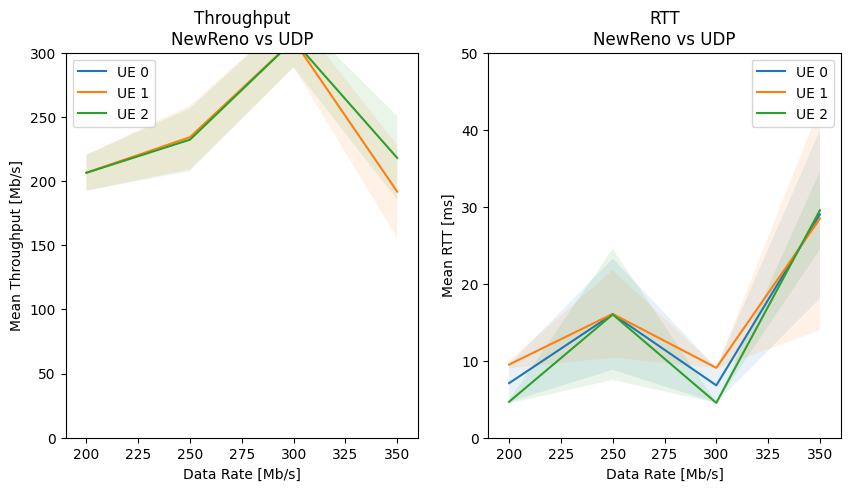

In [24]:
DEBUG=1
folders = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-400',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-500',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-700',
]
reg = load_data(folders)
if DEBUG: print(reg)

df = pd.DataFrame.from_dict(reg)
df = df[df['zone'] == zone]
if DEBUG: print(df)

title = 'Throughput'
subtitle = 'NewReno vs UDP'
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
df.set_index('datarate').groupby('ue')['thr_mean'].plot(ax = ax[0])
for ue in df['ue'].unique():
    ax[0].fill_between(df[df['ue']== ue]['datarate'],
                       df[df['ue']== ue]['thr_mean'] - df[df['ue']== ue]['thr_std'],
                       df[df['ue']== ue]['thr_mean'] + df[df['ue']== ue]['thr_std'], alpha=0.1)

ax[0].set_xlabel("Data Rate [Mb/s]")
ax[0].set_ylabel("Mean Throughput [Mb/s]")
ax[0].set_ylim([0 , 300])
ax[0].set_xlim([df['datarate'].min() - 10 , df['datarate'].max() +10])
text_legend = [ 'UE ' + str(i)  for i in df['ue'].unique()]
ax[0].legend(text_legend)
ax[0].title.set_text(title + '\n' +subtitle)



title = 'RTT'
df.set_index('datarate').groupby('ue')['rtt_mean'].plot(ax = ax[1])
for ue in df['ue'].unique():
    ax[1].fill_between(df[df['ue']== ue]['datarate'],
                       df[df['ue']== ue]['rtt_mean'] - df[df['ue']== ue]['rtt_std'],
                       df[df['ue']== ue]['rtt_mean'] + df[df['ue']== ue]['rtt_std'], alpha=0.1)

ax[1].set_xlabel("Data Rate [Mb/s]")
ax[1].set_ylabel("Mean RTT [ms]")
ax[1].set_ylim([0 , 50])
ax[1].set_xlim([df['datarate'].min() - 10 , df['datarate'].max() +10])
text_legend = [ 'UE ' + str(i)  for i in df['ue'].unique()]
ax[1].legend(text_legend)
ax[1].title.set_text(title + '\n' +subtitle)

plt.show()


RED

/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-600
[1, 1, 0]
['TcpBbr', 'UDP', 'UDP']
part-3
[('resampleperiod', '100'), ('simtime', '60'), ('initime', '0'), ('endtime', '60'), ('appstarttime', '0.2'), ('appendtime', '59.8'), ('nrtrace', '1'), ('tcptrace', '1'), ('flowtype', 'TCP'), ('flowtype1', 'TCP'), ('flowtype2', 'UDP'), ('flowtype3', 'UDP'), ('tcptypeid', 'TcpBbr'), ('tcptypeid1', 'TcpBbr'), ('tcptypeid2', 'UDP'), ('tcptypeid3', 'UDP'), ('frequency', '2.73e+10'), ('bandwidth', '2e+08'), ('serverid', '6'), ('serverid1', '6'), ('serverid2', '7'), ('serverid3', '8'), ('ip_net_server1', '172.16.1.0'), ('ip_net_server2', '172.16.2.0'), ('ip_net_server3', '172.16.3.0'), ('uen1', '1'), ('uen2', '1'), ('uen3', '0'), ('ip_mask_server', '255.255.255.0'), ('uenum', '2'), ('segmentsize', '1448'), ('rlcbuffer', '600000'), ('rlcbufferperc', '200'), ('servertype', 'Edge'), ('datarate', '300'), ('phydistro', '0'), ('aqm', 'None'

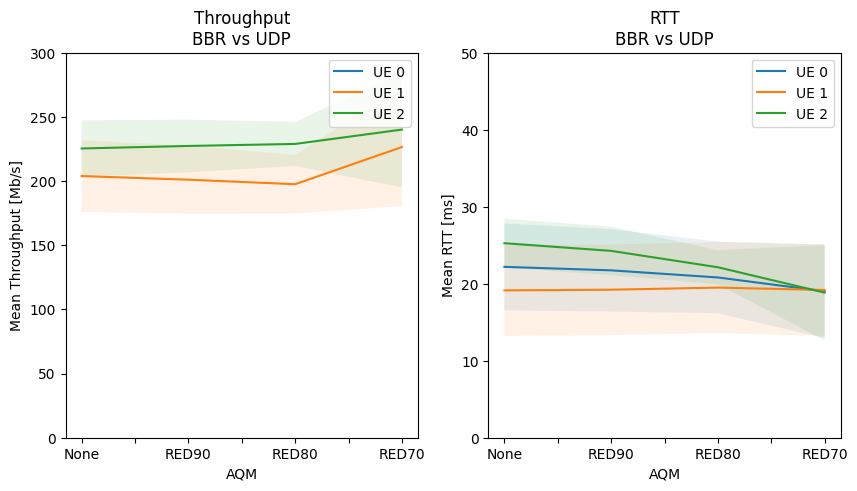

In [25]:
folders = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-UDP-UDP-E-200-UE_1_1_0-AQM_RED90-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-UDP-UDP-E-200-UE_1_1_0-AQM_RED80-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpBbr-UDP-UDP-E-200-UE_1_1_0-AQM_RED70-0_60-600',
]
reg = load_data(folders)
if DEBUG: print(reg)

df = pd.DataFrame.from_dict(reg)
df = df[df['zone'] == zone]
if DEBUG: print(df)

title = 'Throughput'
subtitle = 'BBR vs UDP'
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
df.set_index('aqm').groupby('ue')['thr_mean'].plot(ax = ax[0])
for ue in df['ue'].unique():
    ax[0].fill_between(df[df['ue']== ue]['aqm'],
                       df[df['ue']== ue]['thr_mean'] - df[df['ue']== ue]['thr_std'],
                       df[df['ue']== ue]['thr_mean'] + df[df['ue']== ue]['thr_std'], alpha=0.1)

ax[0].set_xlabel("AQM")
ax[0].set_ylabel("Mean Throughput [Mb/s]")
ax[0].set_ylim([0 , 300])
text_legend = [ 'UE ' + str(i)  for i in df['ue'].unique()]
ax[0].legend(text_legend)
ax[0].title.set_text(title + '\n' +subtitle)


title = 'RTT'
df.set_index('aqm').groupby('ue')['rtt_mean'].plot(ax = ax[1])
for ue in df['ue'].unique():
    ax[1].fill_between(df[df['ue']== ue]['aqm'],
                       df[df['ue']== ue]['rtt_mean'] - df[df['ue']== ue]['rtt_std'],
                       df[df['ue']== ue]['rtt_mean'] + df[df['ue']== ue]['rtt_std'], alpha=0.1)
ax[1].set_xlabel("AQM")
ax[1].set_ylabel("Mean RTT [ms]")
ax[1].set_ylim([0 , 50])
text_legend = [ 'UE ' + str(i)  for i in df['ue'].unique()]
ax[1].legend(text_legend)
ax[1].title.set_text(title + '\n' +subtitle)

plt.show()

/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-600
[1, 1, 0]
['TcpNewReno', 'UDP', 'UDP']
part-3
[('resampleperiod', '100'), ('simtime', '60'), ('initime', '0'), ('endtime', '60'), ('appstarttime', '0.2'), ('appendtime', '59.8'), ('nrtrace', '1'), ('tcptrace', '1'), ('flowtype', 'TCP'), ('flowtype1', 'TCP'), ('flowtype2', 'UDP'), ('flowtype3', 'UDP'), ('tcptypeid', 'TcpNewReno'), ('tcptypeid1', 'TcpNewReno'), ('tcptypeid2', 'UDP'), ('tcptypeid3', 'UDP'), ('frequency', '2.73e+10'), ('bandwidth', '2e+08'), ('serverid', '6'), ('serverid1', '6'), ('serverid2', '7'), ('serverid3', '8'), ('ip_net_server1', '172.16.1.0'), ('ip_net_server2', '172.16.2.0'), ('ip_net_server3', '172.16.3.0'), ('uen1', '1'), ('uen2', '1'), ('uen3', '0'), ('ip_mask_server', '255.255.255.0'), ('uenum', '2'), ('segmentsize', '1448'), ('rlcbuffer', '600000'), ('rlcbufferperc', '200'), ('servertype', 'Edge'), ('datarate', '300'), ('phydistro', '0')

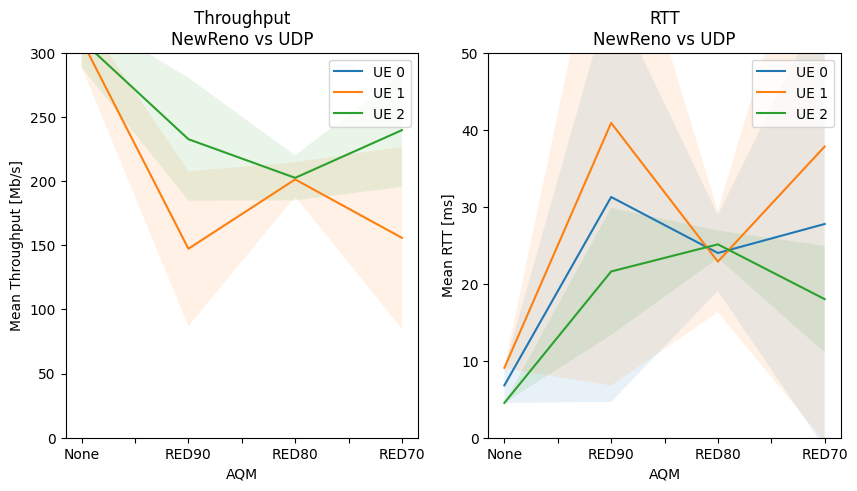

In [26]:
folders = [
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-UDP-UDP-E-200-UE_1_1_0-AQM_None-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-UDP-UDP-E-200-UE_1_1_0-AQM_RED90-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-UDP-UDP-E-200-UE_1_1_0-AQM_RED80-0_60-600',
    '/mnt/g/Mi unidad/doctorado/2024/5G-LENA/ns-3.41/scratch/cca-perf/out/0-TcpNewReno-UDP-UDP-E-200-UE_1_1_0-AQM_RED70-0_60-600',
]
reg = load_data(folders)
if DEBUG: print(reg)

df = pd.DataFrame.from_dict(reg)
df = df[df['zone'] == zone]
if DEBUG: print(df)

title = 'Throughput'
subtitle = 'NewReno vs UDP'
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
df.set_index('aqm').groupby('ue')['thr_mean'].plot(ax = ax[0])
for ue in df['ue'].unique():
    ax[0].fill_between(df[df['ue']== ue]['aqm'],
                       df[df['ue']== ue]['thr_mean'] - df[df['ue']== ue]['thr_std'],
                       df[df['ue']== ue]['thr_mean'] + df[df['ue']== ue]['thr_std'], alpha=0.1)

ax[0].set_xlabel("AQM")
ax[0].set_ylabel("Mean Throughput [Mb/s]")
ax[0].set_ylim([0 , 300])
text_legend = [ 'UE ' + str(i)  for i in df['ue'].unique()]
ax[0].legend(text_legend)
ax[0].title.set_text(title + '\n' +subtitle)


title = 'RTT'
df.set_index('aqm').groupby('ue')['rtt_mean'].plot(ax = ax[1])
for ue in df['ue'].unique():
    ax[1].fill_between(df[df['ue']== ue]['aqm'],
                       df[df['ue']== ue]['rtt_mean'] - df[df['ue']== ue]['rtt_std'],
                       df[df['ue']== ue]['rtt_mean'] + df[df['ue']== ue]['rtt_std'], alpha=0.1)
ax[1].set_xlabel("AQM")
ax[1].set_ylabel("Mean RTT [ms]")
ax[1].set_ylim([0 , 50])
text_legend = [ 'UE ' + str(i)  for i in df['ue'].unique()]
ax[1].legend(text_legend)
ax[1].title.set_text(title + '\n' +subtitle)

plt.show()